In [182]:
#importing the basic libraries
import pandas as pd
import numpy as np
import missingno as msno
from fancyimpute import IterativeImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
# from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("IT Salary Survey EU  2020.csv")

## Data Inconsistency Handling

In [3]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
cat_cols

['Timestamp',
 'Gender',
 'City',
 'Position ',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Yearly bonus + stocks in EUR',
 'Annual bonus+stocks one year ago. Only answer if staying in same country',
 'Number of vacation days',
 'Employment status',
 'Ð¡ontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

## As we can see there are some categorical columns which should have been numerical but due to inconsistency they are in the categorical side

### Inconsistency in Experience Column

In [4]:
#Inspect Experience column
df = df.rename(columns={'Total years of experience': 'Experience'})
df.Experience = df.Experience.str.replace(',','.')
df.Experience = df.Experience.replace('1 (as QA Engineer) / 11 in total','11') \
                             .replace('6 (not as a data scientist. but as a lab scientist)', '6') \
                             .replace('less than year','0') \
                             .replace('15. thereof 8 as CTO', '15')

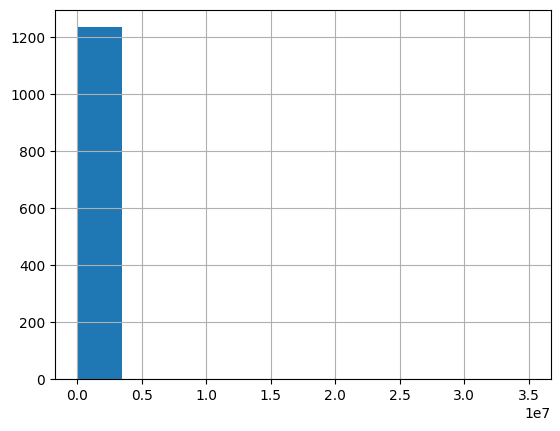

Number of null values: 16
count    1.237000e+03
mean     2.941554e+04
std      9.953565e+05
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.200000e+01
max      3.498103e+07
Name: Experience, dtype: float64


In [5]:

# df3 = df3[(df3['Total years of experience'] <= 100) | (df3['Total years of experience'].isnull
df.Experience = df.Experience.astype('float')
df.Experience.hist()
plt.show()
print(f'Number of null values: {df.Experience.isnull().sum()}')
print(df.Experience.describe())

### We can see that the mean is distorted and we logicaly know that experience can't have such a high mean so we will put some logical replacements

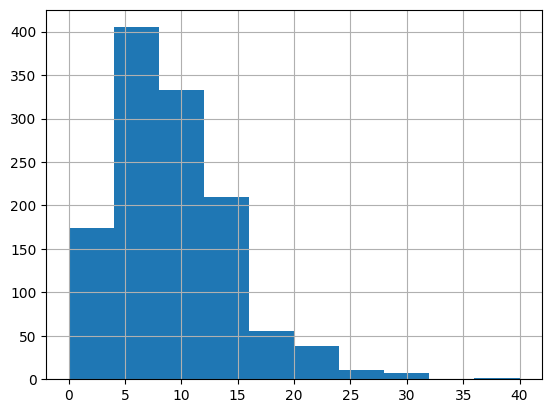

Number of null values: 16
count    1234.000000
mean        8.750081
std         5.281331
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        40.000000
Name: Experience, dtype: float64


In [6]:
df = df[(df['Experience'] <= 100) | (df['Experience'].isnull())]

# df3.Experience = df3.Experience.astype('float')
df.Experience.hist()
plt.show()
print(f'Number of null values: {df.Experience.isnull().sum()}')
print(df.Experience.describe())

## Inconsistency in Germany Experience Column

In [7]:
#Inspect Experience column
df = df.rename(columns={'Years of experience in Germany': 'Germany_Experience'})

In [8]:
df.Germany_Experience = df.Germany_Experience.str.replace(',','.')\
                                                    .replace('< 1','0')\
                                                    .replace('4 (in Switzerland). 0 (in Germany)','0')\
                                                    .replace('4 month','0')\
                                                    .replace('3 months','0')\
                                                    .replace('3 (in Poland)','0')\
                                                    .replace('â\x81°','0')\
                                                    .replace('-','0')\
                                                    .replace('less than year','0')\
                                                    .replace('6 (not as a data scientist. but as a lab scientist)','6')\
                                                    .replace('<1','0')
df.Germany_Experience = df.Germany_Experience.astype('float')

## Handling Data Inconsistency in Programming Language Technology Column

In [9]:
df2 = df.copy()
df2 = df2.rename(columns={'Your main technology / programming language': 'Technology'})
df2[['Tech1', 'Tech2']] = df2.Technology.str.split("/", 1,expand = True)
df2[['Tech1', 'Tech2']] = df2.Tech1.str.split(",", 1,expand = True)
df2[['Tech1', 'Tech2']] = df2.Tech1.str.split(" ", 1,expand = True)

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\2600621637.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['Tech1', 'Tech2']] = df2.Technology.str.split("/", 1,expand = True)
C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\2600621637.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['Tech1', 'Tech2']] = df2.Tech1.str.split(",", 1,expand = True)
C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\2600621637.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df2[['Tech1', 'Tech2']] = df2.Tech1.str.split(" ", 1,expand = True)


### Since there were more than one technology mentioned at a column which only requires one so I picked up only the first tech since the others are mentioned in another column of the dataset also we made column for it too|

In [10]:
df4 = df2.copy()
df4['Tech1'].unique()

array(['TypeScript', 'Ruby', 'Javascript', 'C#', 'AWS', 'Typescript',
       'PHP', 'Java', 'Aws', 'C++', nan, 'Kotlin', 'kotlin', 'NodeJS',
       'iOS', 'Kubernetes', 'Charles', 'SQL', 'Go', 'java', 'Python',
       'Figma', 'JavaScript', 'React', 'Ð¡#', 'Php', 'ruby', '.NET',
       'Hardware', 'Google', 'Js', 'android', 'Scala', 'python', 'VHDL',
       'Power', 'none', 'Android', 'Swift', 'ML', 'php', 'Ml', 'Azure',
       'Frontend', 'yaml', 'JS', '-', 'Agile', 'C', 'Pegasystems',
       'Cloud', 'DC', '--', 'SWIFT', 'Golang', 'go', 'DevOps', '.net',
       'Node.js', 'R', 'Bash', '.Net', 'Network', 'nothing', 'Qlik',
       'Blockchain', 'Angular', 'Autonomous', 'c#', 'T-SQL', 'c++',
       'Pascal', 'Oracle', 'Elixir', 'Erlang', 'Objective-C', 'QA',
       'ABAP', 'Salesforce', 'javascript', 'Web', 'Terraform', 'JAVA',
       'Apache', 'Computer', 'SAP', 'Jira', 'Qml', 'Linux', 'several',
       'embedded', 'typescript', 'Sql', 'Business', 'Management',
       'Nodejs', 'TS', '

### Here we are bound  to perform one missing value handling technique (although we will perform all missing value strategies after data consistency) however here it is important to fill the missing values first

In [11]:
df5 = df4.copy()
# Filling in missing values in column "A" with values from column "B"
df5['Tech1'] = np.where(df5['Tech1'].isnull(), df5['Other technologies/programming languages you use often'], df5['Tech1'])

### The strategy above was if Tech1 is missing so we can easily fill it with corresponding Other Tech value which is a logical filling

### To make this more consistent we will check out for spelling errors, leading and trailing spaces as well as make it all in lower case

In [12]:
df5['Tech1'] = df5['Tech1'].str.lower()
df5['Tech1'] = df5['Tech1'].str.strip()

### create boolean mask for cells that contain "java", "python", "sql", ".net", "javascript" etc

In [13]:
df6 = df5.copy()

In [14]:
# create boolean mask for cells that contain "java"
mask = df6['Tech1'].str.contains('java')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'java'

mask = df6['Tech1'].str.contains('python')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'python'

mask = df6['Tech1'].str.contains('c#')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'c#'

mask = df6['Tech1'].str.contains('react')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'react'

mask = df6['Tech1'].str.contains('node')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'node.js'

mask = df6['Tech1'].str.contains('.net')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = '.net'

mask = df6['Tech1'].str.contains('sql')
mask = mask.fillna(False)
df6.loc[mask, 'Tech1'] = 'sql'

In [15]:
df7 = df6.copy()
# Define a dictionary of misspelled words and their corrections
misspellings = {'nan':'None','ðžñ„ð¼ñ„':'None','ð¡#':'None','--':'None','-':'None','pyrhon': 'python','javscript': 'javascript','js':'javascript','nodsjs':'node.js'}

# Replace the misspelled words using the dictionary
df7['Tech1'] = df7['Tech1'].replace(misspellings)


In [16]:
df7['Tech1'].unique()

array(['typescript', 'ruby', 'java', 'c#', 'aws', 'php', 'c++', nan,
       'kotlin', 'sql', 'node.js', 'ios', '.net', 'charles', 'python',
       'go', 'figma', 'react', 'None', 'c/c++', 'hardware', 'google',
       'javascript', 'android', 'scala', 'vhdl', 'power', 'none', 'swift',
       'ml', 'azure', 'frontend', 'yaml', 'agile', 'c', 'pegasystems',
       'cloud', 'dc', 'golang', 'devops', 'r', 'bash', 'network',
       'aws, google cloud', 'nothing', 'qlik',
       'adobe cloud, sketch, 3ds max', 'blockchain', 'angular',
       'autonomous', 'pascal', 'oracle', 'elixir', 'erlang',
       'objective-c', 'qa', 'abap', 'salesforce', 'web', 'terraform',
       'apache', 'computer', 'sap', 'jira', 'qml', 'linux', 'several',
       'embedded', 'business', 'management', 'ts', 'spark', 'dwh',
       'sketch', 'k8s', 'frontend:', 'vb', 'fbd', 'networking', 'uml',
       'cobol', 'sre', 'clojure', 'spring', 'ai', 'pythin', 'julia', 'pm',
       'grails', 'perl', 'haskell', 'figma, sketch, 

### As we can see the difference our column is now much more consistent than before

## Inconsistency in Salary Column

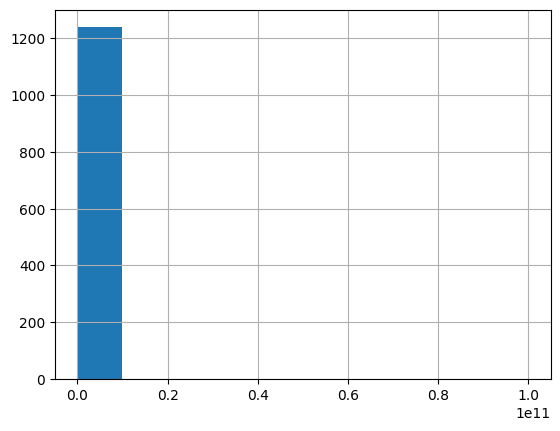

Number of null values: 11
count    1.239000e+03
mean     8.118533e+07
std      2.840977e+09
min      1.000100e+04
25%      5.800000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: YearlySalary, dtype: float64


In [17]:
df7 = df7.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'YearlySalary'})
# df3 = df3[(df3['Total years of experience'] <= 100) | (df3['Total years of experience'].isnull
# df7.Experience = df7.Experience.astype('float')
df7.YearlySalary.hist()
plt.show()
print(f'Number of null values: {df7.YearlySalary.isnull().sum()}')
print(df7.YearlySalary.describe())

## As we can see that the Salaries have some ridiculously high values which are making the data inconsistent so we will handle it by removing those values

In [18]:
 df7 = df7.drop(df7[df7.YearlySalary > 500000].index)

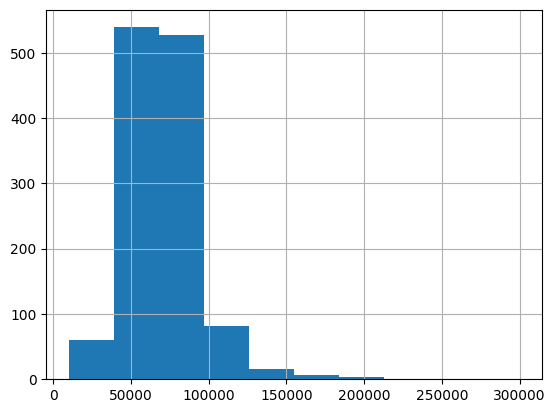

Number of null values: 11
count      1236.000000
mean      71015.171626
std       24447.023108
min       10001.000000
25%       58000.000000
50%       70000.000000
75%       80000.000000
max      300000.000000
Name: YearlySalary, dtype: float64


In [19]:
df7 = df7.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'YearlySalary'})
# df3 = df3[(df3['Total years of experience'] <= 100) | (df3['Total years of experience'].isnull
# df7.Experience = df7.Experience.astype('float')
df7.YearlySalary.hist()
plt.show()
print(f'Number of null values: {df7.YearlySalary.isnull().sum()}')
print(df7.YearlySalary.describe())

### So now we see a much better understanding plot for the Salary Column

## Data Inconsistency in Vacations Column

### this column has categorical entries although it should only have numerical, moreover to handle with 'unlimited' entry we replace it the most logical vacation days found in the dataframe

In [20]:
df8 = df7.copy()
#Inspect Experience column
df8 = df8.rename(columns={'Number of vacation days': 'VacationDays'})
df8.VacationDays = df8.VacationDays.str.replace('unlimited','30') 
df8.VacationDays = df8.VacationDays.replace('(no idea)','0') \
                                        .replace('30 in contract (but theoretically 30)','30') \
                                        .replace('Unlimited ','30') \
                                        .replace('~25','25')\
                                        .replace('23+','23')\
                                        .replace('Unlimited','30') \
                                        .replace('24 labour days','24') \
                                        .replace('unlimited','30')
#                                         .replace('(no idea)','0')\
#                                         .replace('(no idea)','0')\
    

In [21]:
df8['VacationDays'] = df8['VacationDays'].astype(float)

In [22]:
cat_cols = list(df8.select_dtypes(include=['object']).columns)
cat_cols

['Timestamp',
 'Gender',
 'City',
 'Position ',
 'Seniority level',
 'Technology',
 'Other technologies/programming languages you use often',
 'Yearly bonus + stocks in EUR',
 'Annual bonus+stocks one year ago. Only answer if staying in same country',
 'Employment status',
 'Ð¡ontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
 'Tech1',
 'Tech2']

## Inconsistency in Yearly Bonus

In [23]:
df8 = df8.rename(columns={'Yearly bonus + stocks in EUR': 'YearlyBonus'})

In [24]:
df9 = df8.copy()
df9.YearlyBonus = df9.YearlyBonus.str.replace('bvg only','0') 
df9.YearlyBonus = df9.YearlyBonus.replace('depends','0') \
                                        .replace('15000+-','15000') \
                                        .replace('Na','0') \
                                        .replace('-','0') \
                                        .replace('Not sure','0')

In [25]:
df9['YearlyBonus'] = df9['YearlyBonus'].astype(float)

## Inconsistency in Yearly Bonus Last Year

In [26]:
df9 = df9.rename(columns={'Annual bonus+stocks one year ago. Only answer if staying in same country': 'LastAnnualBonus'})

In [27]:
df9.LastAnnualBonus = df9.LastAnnualBonus.str.replace('learning budget, bvg, gym, food','0') 
df9.LastAnnualBonus = df9.LastAnnualBonus.replace('-','0') 

In [28]:
df9['LastAnnualBonus'] = df9['LastAnnualBonus'].astype(float)

In [29]:
cat_cols = list(df9.select_dtypes(include=['object']).columns)
cat_cols

['Timestamp',
 'Gender',
 'City',
 'Position ',
 'Seniority level',
 'Technology',
 'Other technologies/programming languages you use often',
 'Employment status',
 'Ð¡ontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
 'Tech1',
 'Tech2']

## Inconsistency in Additional Support

In [30]:
df9 = df9.rename(columns={'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR': 'AdditonalSupport'})

In [31]:
df9.AdditonalSupport = df9.AdditonalSupport.str.replace('No','0')
df9.AdditonalSupport = df9.AdditonalSupport.replace('no','0') 
df9.AdditonalSupport = df9.AdditonalSupport.replace('180â‚¬','180') 
df9.AdditonalSupport = df9.AdditonalSupport.replace('400 / month','4800') 
df9.AdditonalSupport = df9.AdditonalSupport.replace('yes','0') 
df9.AdditonalSupport = df9.AdditonalSupport.replace('75% from government ','0')
df9.AdditonalSupport = df9.AdditonalSupport.replace('40 every month','480')
df9.AdditonalSupport = df9.AdditonalSupport.replace('200 Amazon voucher','200')
df9.AdditonalSupport = df9.AdditonalSupport.replace('-','0')
df9.AdditonalSupport = df9.AdditonalSupport.replace('600 nett','600')
df9.AdditonalSupport = df9.AdditonalSupport.replace('20%','480')
df9.AdditonalSupport = df9.AdditonalSupport.replace('I was able to move all equipment I need to work to home','0')
df9.AdditonalSupport = df9.AdditonalSupport.replace('0,00','0')
# df9.AdditonalSupport = df9.AdditonalSupport.replace('40 every month','480')

In [32]:
df9['AdditonalSupport'] = df9['AdditonalSupport'].astype(float)

## Inconsistency in Age Column

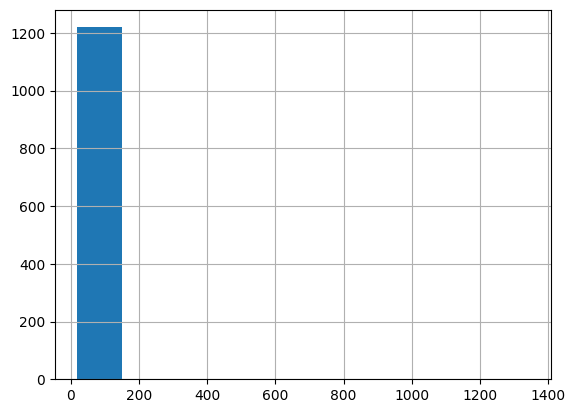

Number of null values: 26
count    1221.000000
mean       34.239148
std        45.069620
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max      1341.000000
Name: Age, dtype: float64


In [33]:
#Inspect age column
df9.Age.hist()
plt.show()
print(f'Number of null values: {df9.Age.isnull().sum()}')
print(df9.Age.describe())

### Due to some outlier the mean and std of Age column is distorted so we will do some logical changes by limiting the age less than 100 

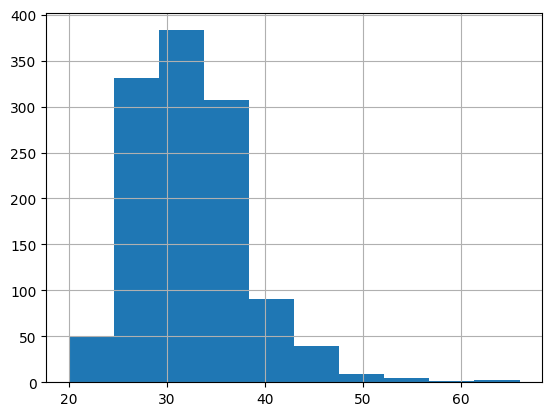

Number of null values: 26
count    1219.000000
mean       32.466776
std         5.570079
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64


In [34]:
#Inspect age column
df9 = df9[(df9['Age'] <= 100) | (df9['Age'].isnull())]
df9.Age.hist()
plt.show()
print(f'Number of null values: {df9.Age.isnull().sum()}')
print(df9.Age.describe())

In [35]:
cat_cols = list(df9.select_dtypes(include=['object']).columns)
cat_cols

['Timestamp',
 'Gender',
 'City',
 'Position ',
 'Seniority level',
 'Technology',
 'Other technologies/programming languages you use often',
 'Employment status',
 'Ð¡ontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Tech1',
 'Tech2']

In [36]:
df9 = df9.rename(columns={'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'LastAnnualSalary'})

In [37]:
df9 = df9.rename(columns={'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week': 'HoursPerWeek'})

In [38]:
df9 = df9.rename(columns={'Have you lost your job due to the coronavirus outbreak?': 'LostJob'})

In [39]:
num_cols = list(df9.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['Age',
 'Experience',
 'Germany_Experience',
 'YearlySalary',
 'YearlyBonus',
 'LastAnnualSalary',
 'LastAnnualBonus',
 'VacationDays',
 'HoursPerWeek',
 'AdditonalSupport']

# Missing values Handling

In [40]:
df9.isnull().sum()

Timestamp                                                    0
Age                                                         26
Gender                                                       9
City                                                         0
Position                                                     9
Experience                                                  15
Germany_Experience                                          31
Seniority level                                             11
Technology                                                 124
Other technologies/programming languages you use often     153
YearlySalary                                                10
YearlyBonus                                                422
LastAnnualSalary                                           365
LastAnnualBonus                                            634
VacationDays                                                65
Employment status                                      

## Own API to check whether the missing data is MAR or not
### It Creates a missingness indicator variable
### Identifies potentially related variables
### Calculates correlation coefficients between missingness indicator variable and related variables
### Calculates correlation coefficient
    

In [41]:
from scipy.stats import pearsonr

missing_col = 'YearlyBonus'

df9['{}_missing'.format(missing_col)] = df9[missing_col].isna().astype(int)

related_vars = ['LastAnnualBonus', 'YearlySalary']

for var in related_vars:
    
    var_array = df9[var].dropna()
    missing_array = df9['{}_missing'.format(missing_col)][df9[var].notnull()]

    corr_coef, p_value = pearsonr(var_array, missing_array)
    print('Correlation between {} and {}_missing: {:.2f}, p-value: {:.4f}'.format(var, missing_col, corr_coef, p_value))
    if p_value < 0.05:
        print('Missing values in {} are likely MAR.'.format(missing_col))
    else:
        print('Missing values in {} are likely MNAR.'.format(missing_col))


Correlation between LastAnnualBonus and YearlyBonus_missing: 0.21, p-value: 0.0000
Missing values in YearlyBonus are likely MAR.
Correlation between YearlySalary and YearlyBonus_missing: -0.09, p-value: 0.0026
Missing values in YearlyBonus are likely MAR.


<AxesSubplot: >

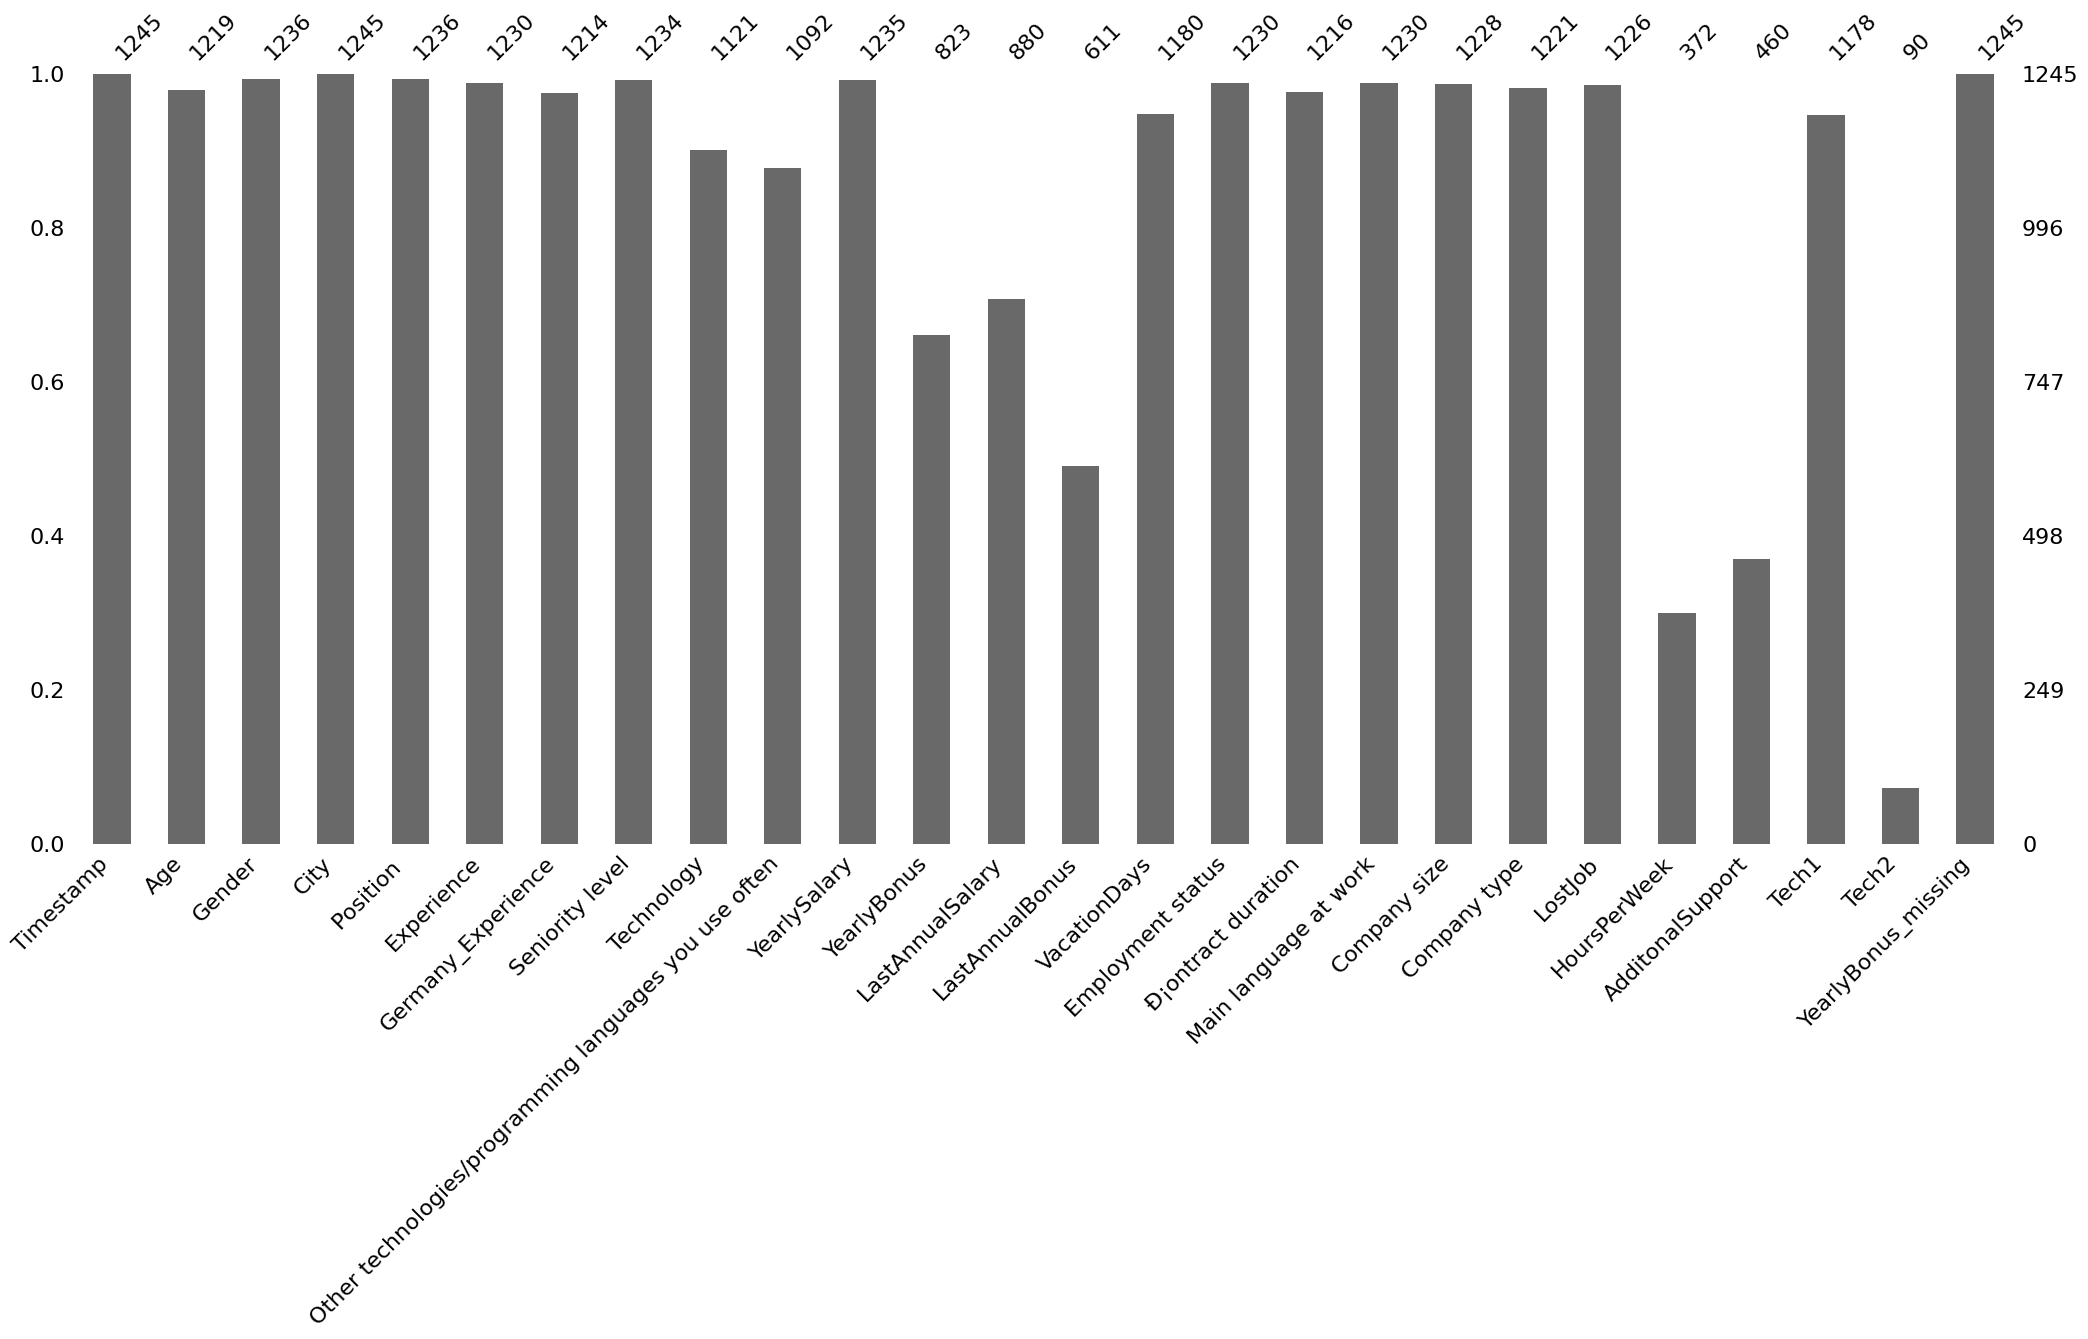

In [42]:
msno.bar(df9)

<AxesSubplot: >

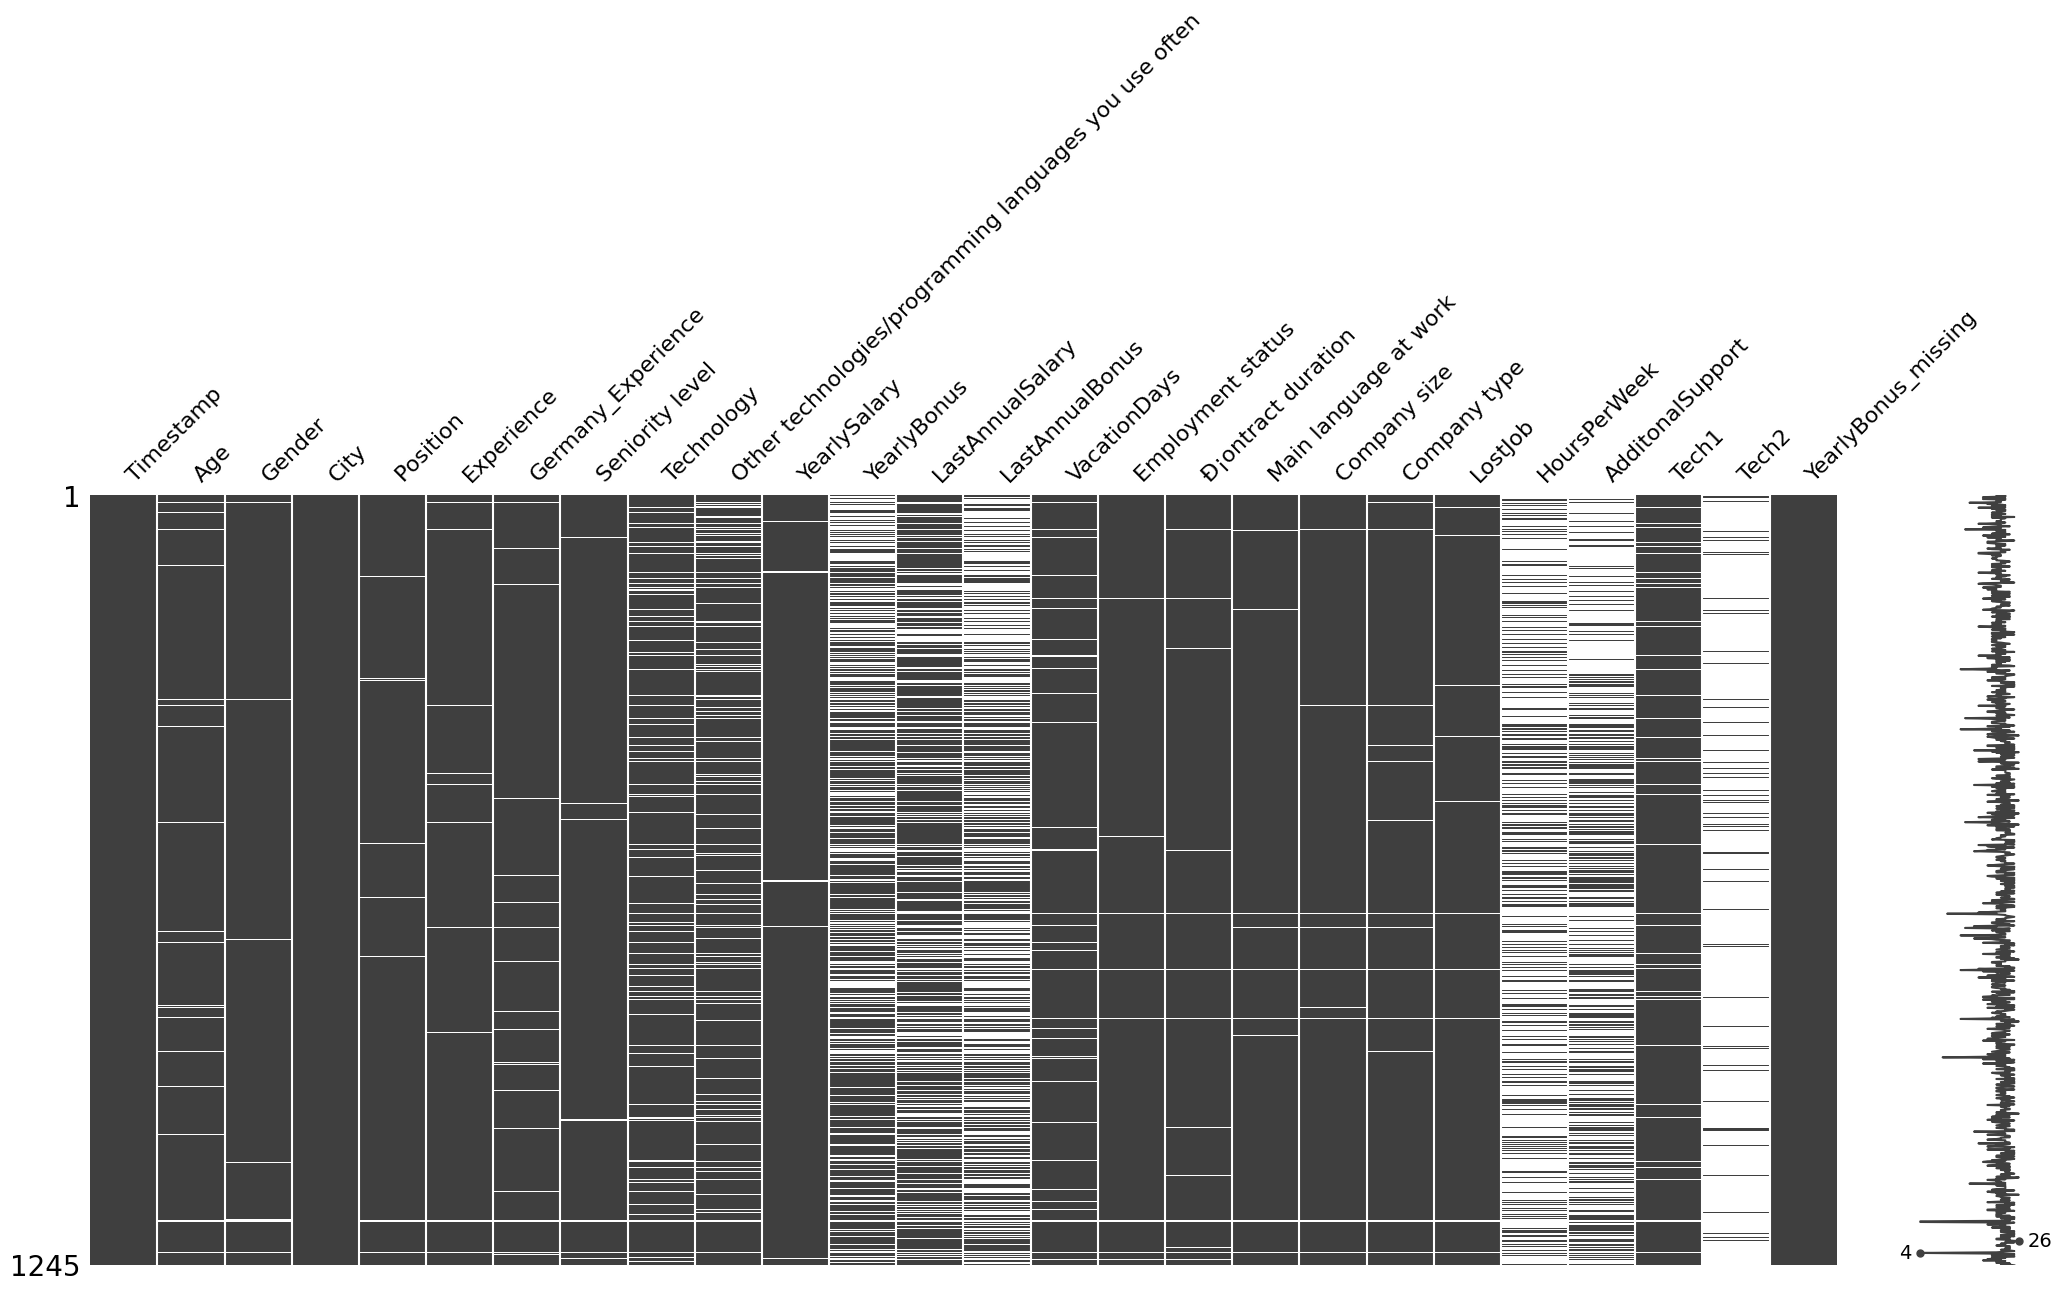

In [43]:
msno.matrix(df9)

<AxesSubplot: >

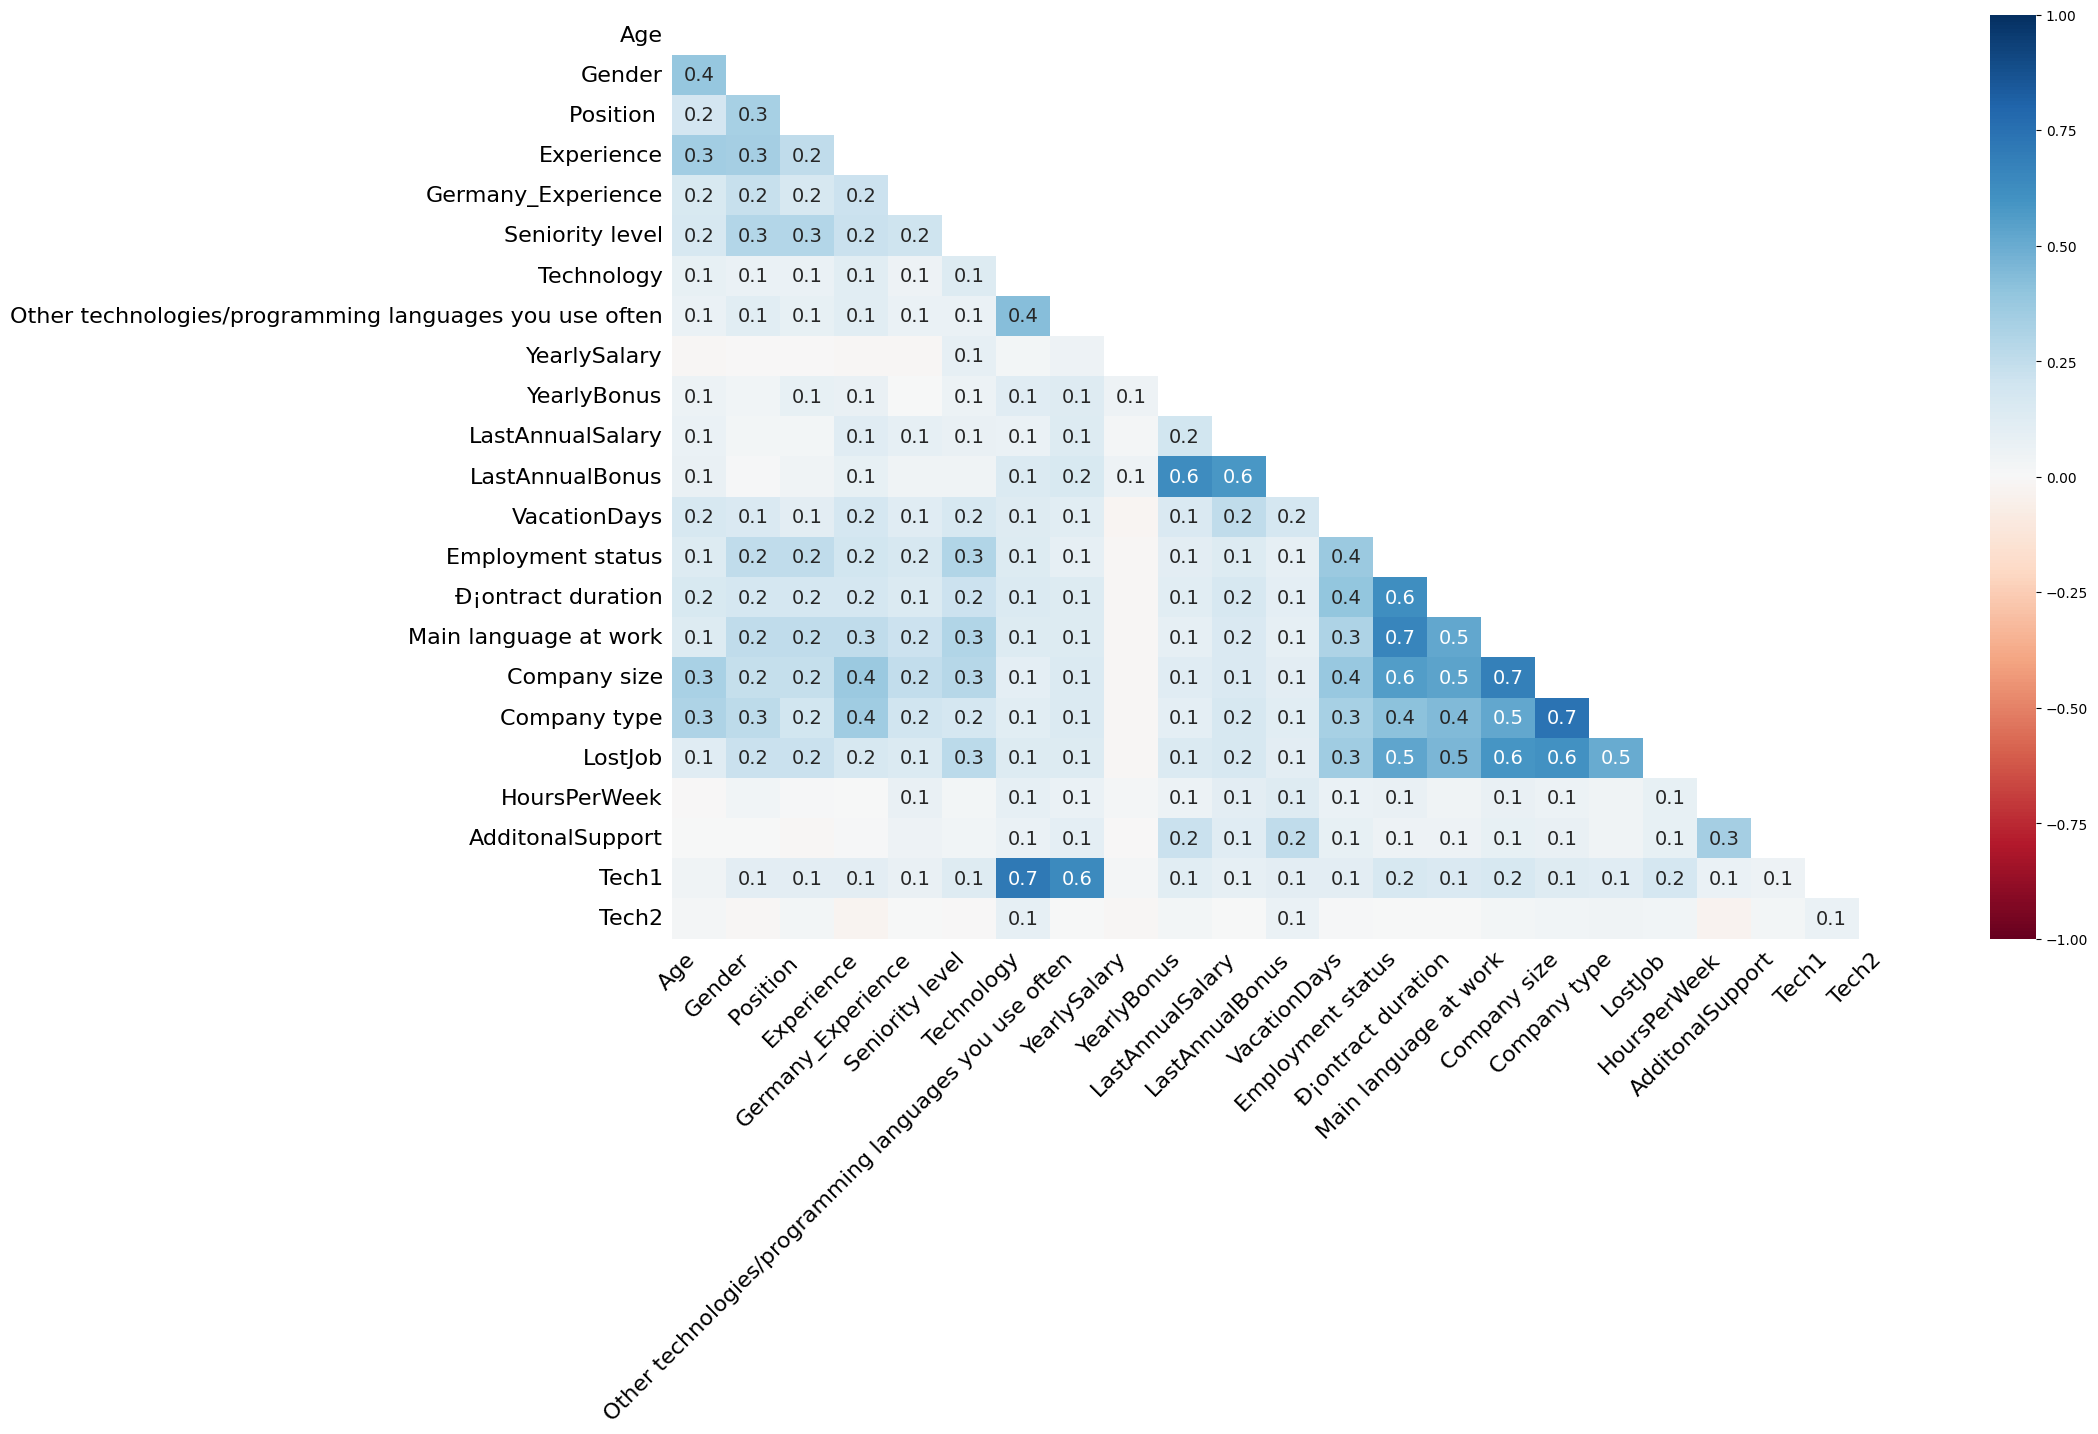

In [44]:
msno.heatmap(df9)

<AxesSubplot: >

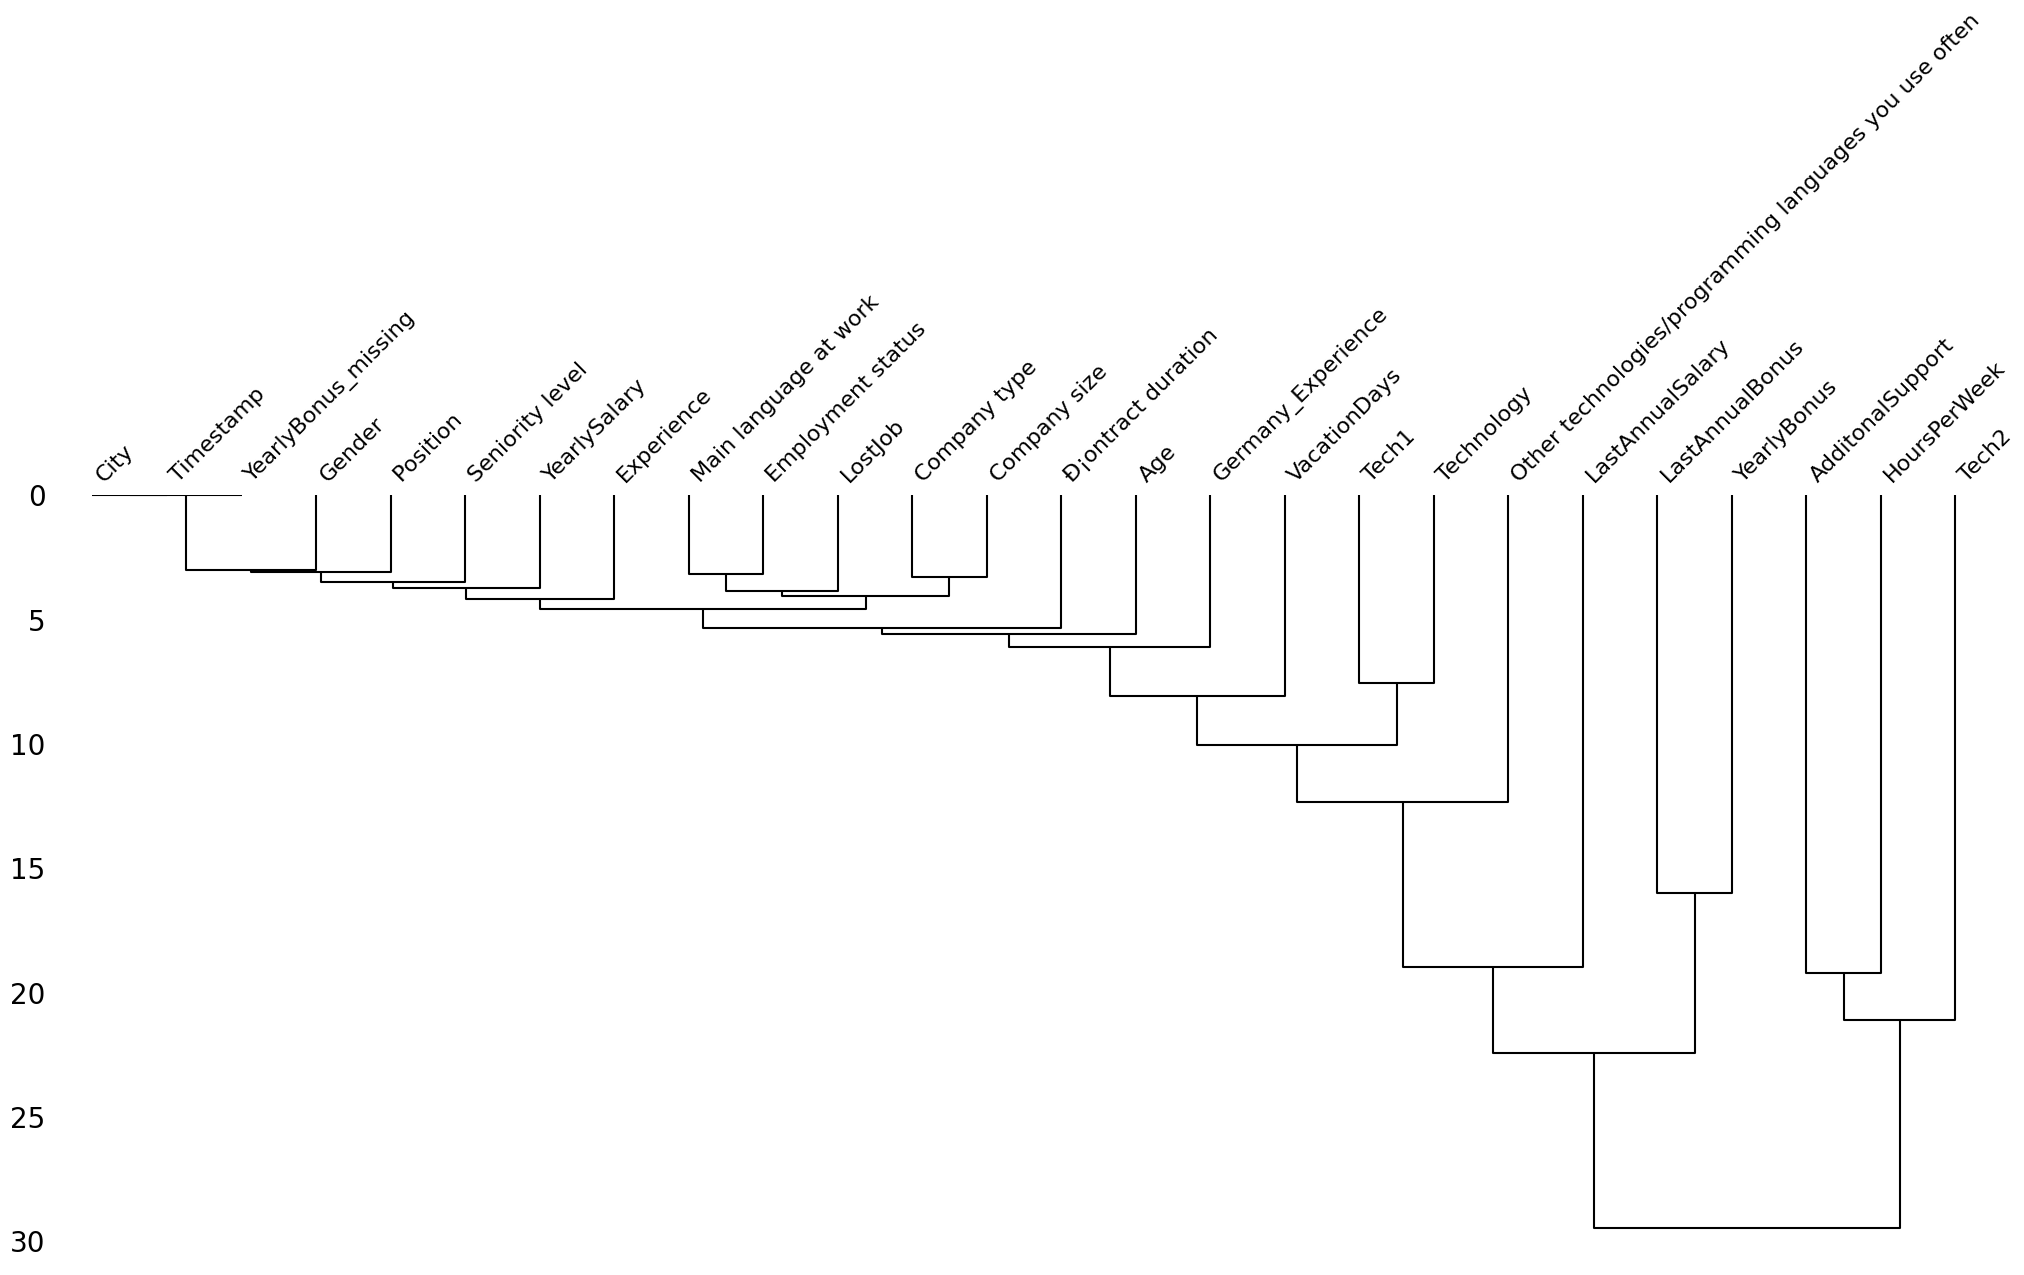

In [45]:
msno.dendrogram(df9)

## Missed values Percentage in the Data

In [46]:
df9.isnull().mean().round(4)*100

Timestamp                                                  0.00
Age                                                        2.09
Gender                                                     0.72
City                                                       0.00
Position                                                   0.72
Experience                                                 1.20
Germany_Experience                                         2.49
Seniority level                                            0.88
Technology                                                 9.96
Other technologies/programming languages you use often    12.29
YearlySalary                                               0.80
YearlyBonus                                               33.90
LastAnnualSalary                                          29.32
LastAnnualBonus                                           50.92
VacationDays                                               5.22
Employment status                       

### So from the above visualization we can see that there are 5 data columns which have missing values above 25%, Our strategy is to retain the data of the columns which have less than 25% missing values and develop a new strategy for the remaining columns according to the dataset

## Age Missing Data

### Since we saw that the missing data of Age column is 40% correlated with the gender and 30% with Company type we can use Mean or Median Imputation that is replace missing values with the mean or median value of the observed datas in the same column

In [47]:
df9[df9['Age'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
11,24/11/2020 11:18,NaN,Male,Berlin,Software Engineer,25.0,11.0,Senior,C++,"Python, C/C++, SQL",...,Temporary contract,English,Nov-50,Product,Yes,NaN,NaN,c++,None,0
12,24/11/2020 11:18,NaN,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,Unlimited contract,English,1000+,NaN,No,NaN,1000.0,php,None,0
28,24/11/2020 11:25,NaN,Male,Berlin,DevOps,14.0,5.0,Senior,NaN,"Python, Go, AWS, Kubernetes, Docker",...,Unlimited contract,English,101-1000,Product,No,NaN,NaN,python,NaN,0
55,24/11/2020 11:33,NaN,Male,Berlin,Software Engineer,NaN,1.0,Senior,PHP,NaN,...,NaN,English,NaN,NaN,No,0.0,NaN,php,None,1
113,24/11/2020 11:56,NaN,Male,Berlin,QA Engineer,6.0,6.0,Middle,Javascript,"Javascript / Typescript, AWS",...,Unlimited contract,English,101-1000,Product,No,0.0,NaN,java,None,1
300,24/11/2020 15:47,NaN,Male,Berlin,Data Engineer,7.5,1.5,Middle,SQL,"Python, SQL, AWS, Kubernetes, Docker",...,Unlimited contract,English,101-1000,Product,No,NaN,NaN,sql,None,0
330,24/11/2020 17:29,NaN,NaN,Munich,Data Scientist,2.0,2.0,Middle,Python,NaN,...,Unlimited contract,English,51-100,Product,No,NaN,NaN,python,,1
340,24/11/2020 17:40,NaN,Male,Hamburg,Support Engineer,NaN,2.0,Senior,NaN,"Kubernetes, Docker",...,Unlimited contract,English,NaN,NaN,No,NaN,100.0,.net,NaN,1
365,24/11/2020 18:31,NaN,Male,Berlin,Software Engineer,9.0,1.0,Lead,Java,"AWS, Docker",...,Unlimited contract,English,1000+,Startup,No,20.0,0.0,java,None,1
374,24/11/2020 18:48,NaN,Male,Karlsruhe,Backend Developer,8.0,8.0,Lead,Python,"Python, C/C++, Javascript / Typescript, Java /...",...,Unlimited contract,English,up to 10,Product,No,39.0,10000.0,python,None,0


In [48]:
df9[(df9['Company type'] == 'Product') & (df9['Gender'] == 'Male')  ].mean()

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\3901390547.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df9[(df9['Company type'] == 'Product') & (df9['Gender'] == 'Male')  ].mean()


Age                    3.301911e+01
Experience             9.535906e+00
Germany_Experience     3.912520e+00
YearlySalary           7.381036e+04
YearlyBonus            2.364383e+04
LastAnnualSalary       6.881981e+04
LastAnnualBonus        7.173481e+06
VacationDays           3.555887e+01
HoursPerWeek           1.174339e+01
AdditonalSupport       5.148040e+02
YearlyBonus_missing    3.150470e-01
dtype: float64

In [49]:
df9['Age'].fillna(32, inplace=True)

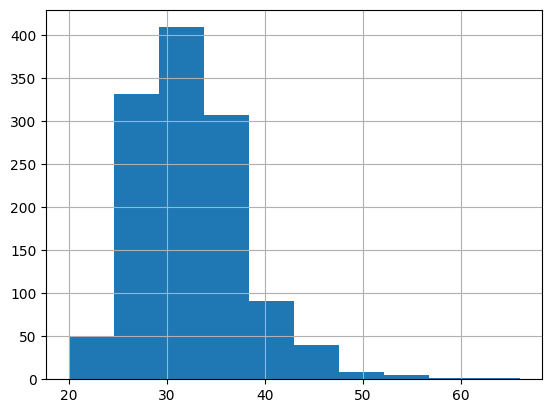

Number of null values: 0
count    1245.000000
mean       32.457028
std         5.511968
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        66.000000
Name: Age, dtype: float64


In [50]:
#Inspect age column
df9.Age.hist()
plt.show()
print(f'Number of null values: {df9.Age.isnull().sum()}')
print(df9.Age.describe())

### This distribution shows our imputation is right since the shape of the distribution as well as the mean of the distribution is still same, so our startegy to fill missing value of Age is right,  Mean imputation can be used for missing values treatment as it is robust to outliers


# Gender Column missing values

In [51]:
print(f'Number of missing values: {df9.Gender.isna().sum()}')
print(df9.Gender.value_counts())

Number of missing values: 9
Male       1043
Female      191
Diverse       2
Name: Gender, dtype: int64


### Since the missing values are only 10, and since it is a categorical variable we cant use KNN imputer, also since it has less values its not feasible to use MICE either.

In [52]:
df9[df9['Gender'].isnull()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
12,24/11/2020 11:18,32.0,NaN,Berlin,Software Engineer,NaN,NaN,Lead,PHP,NaN,...,Unlimited contract,English,1000+,NaN,No,NaN,1000.0,php,None,0
330,24/11/2020 17:29,32.0,NaN,Munich,Data Scientist,2.0,2.0,Middle,Python,NaN,...,Unlimited contract,English,51-100,Product,No,NaN,NaN,python,,1
721,26/11/2020 0:06,40.0,NaN,Berlin,Backend Developer,13.0,13.0,Senior,python,"Python, Javascript / Typescript, AWS, Docker",...,Unlimited contract,English,51-100,Startup,No,NaN,NaN,python,None,1
1085,4/12/2020 20:33,37.0,NaN,Munich,Software Engineer,15.0,6.0,Senior,C,"Python, C/C++, Docker",...,Unlimited contract,English,1000+,Product,No,NaN,700.0,c,None,0
1148,11/12/2020 22:36,32.0,NaN,Frankfurt,Software Engineer,10.0,10.0,Senior,Python,"Python, C/C++, Docker",...,Unlimited contract,German,101-1000,Product,No,0.0,NaN,python,None,0
1178,19/12/2020 9:31,31.0,NaN,Berlin,ML Engineer,5.0,2.5,Middle,Python,"Java / Scala, AWS, Google Cloud, Kubernetes, D...",...,Unlimited contract,English,1000+,Product,No,NaN,700.0,python,None,0
1180,20/12/2020 0:30,32.0,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1181,20/12/2020 0:31,32.0,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1231,8/1/2021 12:52,32.0,NaN,Munich,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [53]:
df9.Gender.value_counts(normalize=True).mul(100).round(1)

Male       84.4
Female     15.5
Diverse     0.2
Name: Gender, dtype: float64

### Total missing values are 10. Considering the ratio - male people are more so we will  assume missing values have mostly male, replacing missing values with Male

In [54]:
df9['Gender'] = df9['Gender'].fillna('Male')

# Position Column Missing Values

In [55]:
df9[df9['Position '].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
131,24/11/2020 12:04,34.0,Male,Munich,NaN,17.0,6.0,Lead,Java,"Python, Java / Scala, R, SQL, Go, AWS, Google ...",...,Unlimited contract,German,1000+,Consulting / Agency,No,NaN,5000.0,java,None,0
296,24/11/2020 15:39,65.0,Male,Berlin,NaN,25.0,25.0,Senior,"Pascal, VB.NET, C#",".NET, SQL",...,Unlimited contract,German,51-100,Product,No,NaN,NaN,pascal,None,1
299,24/11/2020 15:42,28.0,Male,Berlin,NaN,7.0,1.0,Senior,PHP,"Javascript / Typescript, .NET, SQL, Azure, Kub...",...,Unlimited contract,English,101-1000,Product,No,NaN,NaN,php,None,1
565,25/11/2020 12:29,26.0,Male,Berlin,NaN,2.0,2.0,Middle,Python,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",...,Unlimited contract,English,1000+,Product,No,NaN,700.0,python,None,0
652,25/11/2020 17:46,34.0,Female,Berlin,NaN,13.0,3.0,Principal,python,"AWS, Terraform, Scala Spark,",...,Unlimited contract,English,1000+,Product,No,30.0,500.0,python,None,1
749,26/11/2020 9:51,42.0,Female,Berlin,NaN,5.0,5.0,Middle,Java,NaN,...,Unlimited contract,English,51-100,Product,No,30.0,0.0,java,None,1
1180,20/12/2020 0:30,32.0,Male,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1181,20/12/2020 0:31,32.0,Male,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1231,8/1/2021 12:52,32.0,Male,Munich,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## MCAR Case!!!
### Before handling Position column we can see 1180, 1181 and 1231 are the rows which have almost all the entries empty, we saw them in Age missing values too, so it is logical to drop these rows

In [56]:
df10 = df9.copy()
df10 = df10.drop([1180, 1181, 1231])

In [57]:
df10[df10['Position '].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
131,24/11/2020 12:04,34.0,Male,Munich,NaN,17.0,6.0,Lead,Java,"Python, Java / Scala, R, SQL, Go, AWS, Google ...",...,Unlimited contract,German,1000+,Consulting / Agency,No,NaN,5000.0,java,None,0
296,24/11/2020 15:39,65.0,Male,Berlin,NaN,25.0,25.0,Senior,"Pascal, VB.NET, C#",".NET, SQL",...,Unlimited contract,German,51-100,Product,No,NaN,NaN,pascal,None,1
299,24/11/2020 15:42,28.0,Male,Berlin,NaN,7.0,1.0,Senior,PHP,"Javascript / Typescript, .NET, SQL, Azure, Kub...",...,Unlimited contract,English,101-1000,Product,No,NaN,NaN,php,None,1
565,25/11/2020 12:29,26.0,Male,Berlin,NaN,2.0,2.0,Middle,Python,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",...,Unlimited contract,English,1000+,Product,No,NaN,700.0,python,None,0
652,25/11/2020 17:46,34.0,Female,Berlin,NaN,13.0,3.0,Principal,python,"AWS, Terraform, Scala Spark,",...,Unlimited contract,English,1000+,Product,No,30.0,500.0,python,None,1
749,26/11/2020 9:51,42.0,Female,Berlin,NaN,5.0,5.0,Middle,Java,NaN,...,Unlimited contract,English,51-100,Product,No,30.0,0.0,java,None,1


### Things to note in dataset where Position value is missing
### 1) No relation with the numerical columns in the dataset
### 2) Most of them have City = 'Berlin', Employment Status = 'Full Time' and Company Type = 'Product'

In [58]:
df10[(df10['City'] == 'Berlin') & (df10['Employment status'] == 'Full-time employee')  ].mode()

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
0,24/11/2020 11:44,30.0,Male,Berlin,Software Engineer,10.0,2.0,Senior,Java,Javascript / Typescript,...,Unlimited contract,English,1000+,Product,No,0.0,0.0,java,,0


### Majority of Employees are Software Engineers when City is Berlin and Emloyment Status is Fully Employed

In [59]:
mask = (df10['City'] == 'Berlin')
df10.loc[mask, 'Position '] = df10.loc[mask, 'Position '].fillna('Software Engineer')

In [60]:
## Handling one left null value with mode
df10['Position '] = df10['Position '].fillna(df10['Position '].mode().iloc[0])

In [61]:
df10.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                  12
Germany_Experience                                          28
Seniority level                                              8
Technology                                                 121
Other technologies/programming languages you use often     150
YearlySalary                                                10
YearlyBonus                                                419
LastAnnualSalary                                           362
LastAnnualBonus                                            631
VacationDays                                                62
Employment status                                      

# Experience Column

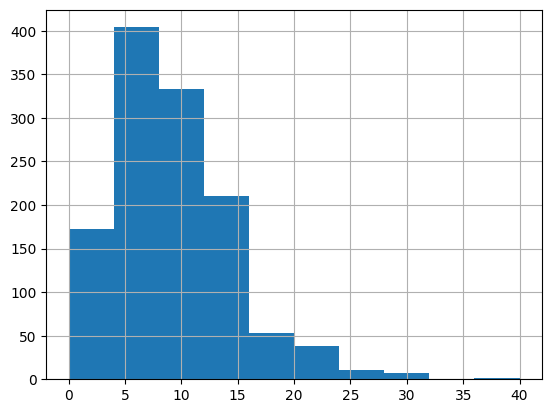

Number of null values: 12
count    1230.000000
mean        8.743577
std         5.271521
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        40.000000
Name: Experience, dtype: float64


In [62]:
df10.Experience.hist()
plt.show()
print(f'Number of null values: {df10.Experience.isnull().sum()}')
print(df10.Experience.describe())

### Our strategy here is to predict the Experience with the help of the Age in the corresponding column with the help of Linear Regression

In [63]:
# split the data into training and testing sets
train_df = df10[df10['Experience'].notna()]
test_df = df10[df10['Experience'].isna()]

# train a linear regression model
model = LinearRegression()
model.fit(train_df[['Age']], train_df['Experience'])

# predict the missing values
test_df['Experience'] = model.predict(test_df[['Age']])

# combine the training and testing sets
df10 = pd.concat([train_df, test_df], ignore_index=True)

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\3493947907.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Experience'] = model.predict(test_df[['Age']])


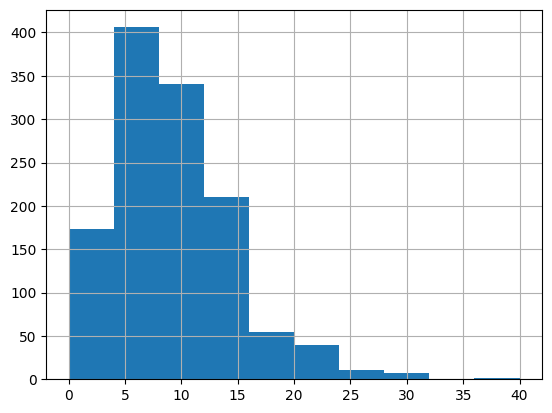

Number of null values: 0
count    1242.000000
mean        8.764617
std         5.269956
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        40.000000
Name: Experience, dtype: float64


In [64]:
df10.Experience.hist()
plt.show()
print(f'Number of null values: {df10.Experience.isnull().sum()}')
print(df10.Experience.describe())

### As we can see the distribution of the column is still the same and the mean is not distorted which proves our imputation is right

## Senority Level Missing Values

In [65]:
df10[df10['Seniority level'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
66,24/11/2020 11:39,48.0,Male,London,Data Engineer,23.0,0.0,NaN,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",...,Temporary contract,English,up to 10,Personal Ltd,Yes,NaN,NaN,google,Cloud Platform,1
353,24/11/2020 18:10,26.0,Male,Karlsruhe,Software Engineer,5.0,5.0,NaN,NaN,"Python, Kotlin, Javascript / Typescript, Java ...",...,Unlimited contract,50/50,Nov-50,Consulting / Agency,No,32.0,0.0,java,NaN,0
491,25/11/2020 9:05,24.0,Male,Cologne,Data Scientist,1.0,1.0,NaN,Python,"SQL, Google Cloud, Kubernetes, Docker",...,Unlimited contract,English,Nov-50,Consulting / Agency,No,0.0,0.0,python,None,0
517,25/11/2020 10:53,37.0,Male,Berlin,Data Analyst,3.0,1.0,NaN,Python,SQL,...,Unlimited contract,English,1000+,Product,No,NaN,NaN,python,None,0
898,29/11/2020 19:42,24.0,Male,Berlin,ML Engineer,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Startup,NaN,NaN,NaN,NaN,NaN,1
999,1/12/2020 8:38,32.0,Female,Heidelberg,Software Engineer,8.0,0.0,NaN,Typescript,"Javascript / Typescript, .NET, C#, Angular",...,Unlimited contract,English,101-1000,Product,Yes,NaN,NaN,typescript,None,1
1001,1/12/2020 8:45,31.0,Male,Munich,DevOps,8.0,2.0,NaN,NaN,"Kubernetes, Docker",...,Unlimited contract,English,51-100,Product,No,NaN,NaN,.net,NaN,0
1219,15/01/2021 18:28,30.0,Male,Berlin,SRE,10.0,5.0,NaN,Kubernetes,"Go, Kubernetes",...,Unlimited contract,English,101-1000,Product,No,NaN,NaN,.net,None,1


#### We can see 90% of missing values are from 
#### Gender =  Male and Employment Status = Fully Employed so we can use them to impute our values

In [66]:
df10[(df10['Gender'] == 'Male') & (df10['Employment status'] == 'Full-time employee')  ].mode()

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Ð¡ontract duration,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing
0,24/11/2020 11:18,30.0,Male,Berlin,Software Engineer,10.0,2.0,Senior,Java,Javascript / Typescript,...,Unlimited contract,English,1000+,Product,No,0.0,0.0,java,,0.0
1,24/11/2020 11:33,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24/11/2020 11:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24/11/2020 11:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24/11/2020 11:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24/11/2020 12:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24/11/2020 12:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24/11/2020 12:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
mask = (df10['Gender'] == 'Male')
df10.loc[mask, 'Seniority level'] = df10.loc[mask, 'Seniority level'].fillna('Senior')
df10['Seniority level'] = df10['Seniority level'].fillna(df10['Seniority level'].mode().iloc[0])

### K-means clustering is a technique used for unsupervised learning, which means it doesn't require a target variable to make predictions. Therefore, it is not suitable for predicting a categorical column by another categorical column.

## Missing Values in Salary

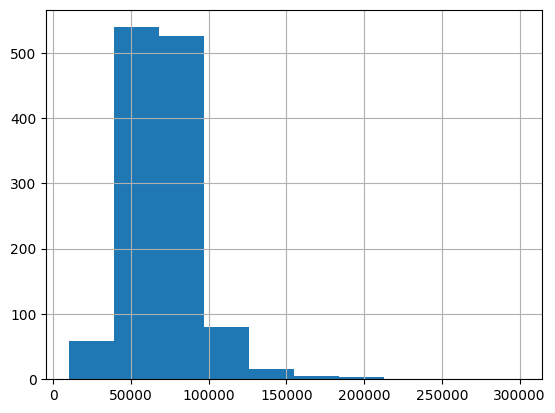

Number of null values: 10
count      1232.000000
mean      70944.513904
std       24299.962035
min       10001.000000
25%       58000.000000
50%       70000.000000
75%       80000.000000
max      300000.000000
Name: YearlySalary, dtype: float64


In [68]:
df10.YearlySalary.hist()
plt.show()
print(f'Number of null values: {df10.YearlySalary.isnull().sum()}')
print(df10.YearlySalary.describe())

### Since Salary is the column which is dependent on most of the columns of the dataset so the strategy to predict the missing values with MICE is logical

In [69]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

df11 = df10.copy()

# Identify column with missing values
missing_col = 'YearlySalary'

# Create a binary indicator column for missing values
df11[missing_col + '_is_missing'] = df11[missing_col].isnull().astype(int)

# Use IterativeImputer with BayesianRidge model to perform MICE on numerical column
imputer = IterativeImputer(estimator=BayesianRidge(), initial_strategy='most_frequent')
df11_imputed = imputer.fit_transform(df11[[missing_col, missing_col + '_is_missing']])

# Replace missing values in original dataframe with imputed values
df11[missing_col] = df11_imputed[:, 0]

# Drop the binary indicator column
df11 = df11.drop(missing_col + '_is_missing', axis=1)


C:\Program Files\Python310\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


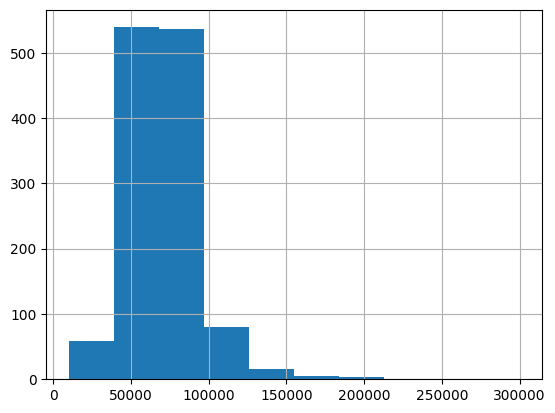

Number of null values: 0
count      1242.000000
mean      70944.513904
std       24201.859244
min       10001.000000
25%       58200.000000
50%       70000.000000
75%       80000.000000
max      300000.000000
Name: YearlySalary, dtype: float64


In [70]:
df11.YearlySalary.hist()
plt.show()
print(f'Number of null values: {df11.YearlySalary.isnull().sum()}')
print(df11.YearlySalary.describe())

### As we can see that the histogram and mean both are not distorted which proves our result for missing values are accurate

## Yearly Bonus, Last Year Salary, Last Year Bonus, Hours per Week, Additional Support have the highest missing values

### Looking at missing percentage we can choose to drop all these column but since these columns were optional we can fill these columns with 0 value too, since thats what best assumption for all these columns, Yearly Bonus can be logically zero, Last year Salary all of them have specific conditions to fill, if the conditions  are not met data entry is not required so it will presumed 0.

In [71]:
df11.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                          28
Seniority level                                              0
Technology                                                 121
Other technologies/programming languages you use often     150
YearlySalary                                                 0
YearlyBonus                                                419
LastAnnualSalary                                           362
LastAnnualBonus                                            631
VacationDays                                                62
Employment status                                      

In [72]:
df11['HoursPerWeek'] = df11['HoursPerWeek'].fillna(0)
df11['AdditonalSupport'] = df11['AdditonalSupport'].fillna(0)
df11['YearlyBonus'] = df11['YearlyBonus'].fillna(0)
df11['LastAnnualSalary'] = df11['LastAnnualSalary'].fillna(0)
df11['LastAnnualBonus'] = df11['LastAnnualBonus'].fillna(0)

In [73]:
df11.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                          28
Seniority level                                              0
Technology                                                 121
Other technologies/programming languages you use often     150
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                62
Employment status                                      

## Germany Experience Missing values

### This column also highly depends on other columns such as Age, Position etc so using MICE for this is also logical

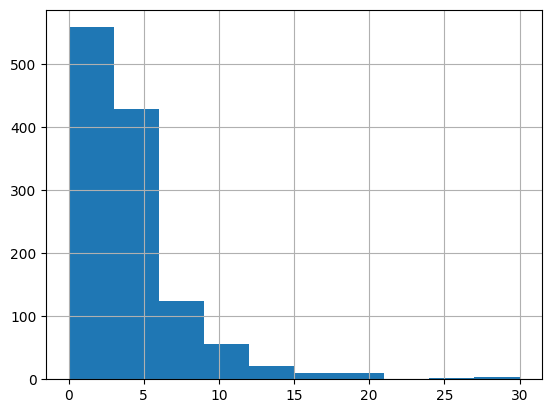

Number of null values: 28
count    1214.000000
mean        3.691928
std         3.625168
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: Germany_Experience, dtype: float64


In [74]:
df11.Germany_Experience.hist()
plt.show()
print(f'Number of null values: {df11.Germany_Experience.isnull().sum()}')
print(df11.Germany_Experience.describe())

In [75]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge

# Identify column with missing values
missing_col = 'Germany_Experience'

# Create a binary indicator column for missing values
df11[missing_col + '_is_missing'] = df11[missing_col].isnull().astype(int)

# Use IterativeImputer with BayesianRidge model to perform MICE on numerical column
imputer = IterativeImputer(estimator=BayesianRidge(), initial_strategy='most_frequent')
df11_imputed = imputer.fit_transform(df11[[missing_col, missing_col + '_is_missing']])

# Replace missing values in original dataframe with imputed values
df11[missing_col] = df11_imputed[:, 0]

# Drop the binary indicator column
df11 = df11.drop(missing_col + '_is_missing', axis=1)


C:\Program Files\Python310\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


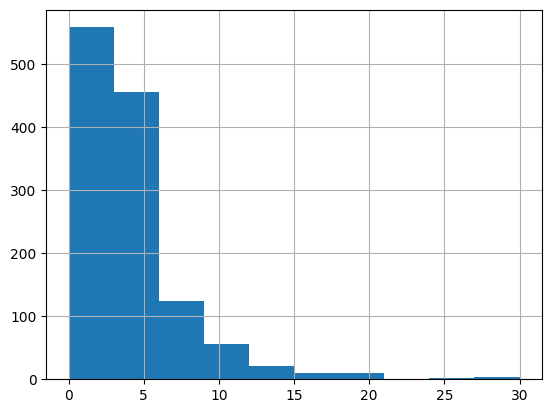

Number of null values: 0
count    1242.000000
mean        3.691928
std         3.584038
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: Germany_Experience, dtype: float64


In [76]:
df11.Germany_Experience.hist()
plt.show()
print(f'Number of null values: {df11.Germany_Experience.isnull().sum()}')
print(df11.Germany_Experience.describe())

### As we can see the distribution of the column is still the same and the mean is not distorted which proves our imputation is right

In [77]:
df11.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 121
Other technologies/programming languages you use often     150
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                62
Employment status                                      

## Vacation Days

In [78]:
from scipy.stats import pearsonr

missing_col = 'VacationDays'

df9['{}_missing'.format(missing_col)] = df9[missing_col].isna().astype(int)

related_vars = ['YearlyBonus','LastAnnualBonus', 'YearlySalary','Experience','Germany_Experience']

for var in related_vars:
    
    var_array = df9[var].dropna()
    missing_array = df9['{}_missing'.format(missing_col)][df9[var].notnull()]

    corr_coef, p_value = pearsonr(var_array, missing_array)
    print('Correlation between {} and {}_missing: {:.2f}, p-value: {:.4f}'.format(var, missing_col, corr_coef, p_value))
    if p_value < 0.05:
        print('Missing values in {} are likely MAR.'.format(missing_col))
    else:
        print('Missing values in {} are likely MNAR.'.format(missing_col))


Correlation between YearlyBonus and VacationDays_missing: 0.01, p-value: 0.8851
Missing values in VacationDays are likely MNAR.
Correlation between LastAnnualBonus and VacationDays_missing: -0.00, p-value: 0.9080
Missing values in VacationDays are likely MNAR.
Correlation between YearlySalary and VacationDays_missing: 0.01, p-value: 0.7396
Missing values in VacationDays are likely MNAR.
Correlation between Experience and VacationDays_missing: -0.01, p-value: 0.7257
Missing values in VacationDays are likely MNAR.
Correlation between Germany_Experience and VacationDays_missing: 0.00, p-value: 0.9447
Missing values in VacationDays are likely MNAR.


## We can see that there is no association between numerical columns for Vacation Days so we will use Categorical columns to check for any association using Chi Square Test

## Self made API for test 

In [81]:
cat_cols = ['Seniority level', 'Gender','Position ']
num_col = 'VacationDays'

# Create a missingness indicator variable for the numerical column
df11['{}_missing'.format(num_col)] = df11[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df11[col], df11['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Seniority level and VacationDays:
chi2: 59.8106, p-value: 0.0000, degrees of freedom: 23
Chi-square test for independence between Gender and VacationDays:
chi2: 8.6038, p-value: 0.0135, degrees of freedom: 2
Chi-square test for independence between Position  and VacationDays:
chi2: 99.4353, p-value: 0.9994, degrees of freedom: 149


In [82]:
# df11[(df11['VacationDays'].isna()) & ((df11['Position ']=='Backend Developer') | (df11['Position ']=='Backend Developer'))]
df11[(df11['VacationDays'].isna()) & (df11['Gender']=='Male')]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing
66,24/11/2020 11:39,48.0,Male,London,Data Engineer,23.000000,0.000000,Senior,Google Cloud Platform,"Python, SQL, Go, Google Cloud, bash",...,English,up to 10,Personal Ltd,Yes,0.0,0.00,google,Cloud Platform,1,1
128,24/11/2020 12:04,30.0,Male,Berlin,Software Engineer,10.000000,5.000000,Lead,Python,"Python, SQL",...,English,101-1000,Startup,No,30.0,0.00,python,None,0,1
165,24/11/2020 12:23,28.0,Male,Moldova,Backend Developer,4.000000,0.000000,Middle,Java,"Kotlin, Java / Scala",...,English,51-100,Startup,Yes,0.0,0.00,java,,1,1
181,24/11/2020 12:36,36.0,Male,Rosenheim,Data Science Manager,12.000000,0.500000,Manager,Python,"R, SQL, AWS, Azure, Docker",...,English,1000+,Construction,No,0.0,0.00,python,None,0,1
182,24/11/2020 12:37,35.0,Male,Berlin,Product Manager,10.000000,5.000000,Senior,php,"PHP, Javascript / Typescript",...,English,101-1000,Product,No,0.0,0.00,php,None,0,1
231,24/11/2020 13:54,53.0,Male,Stuttgart,Frontend Developer,15.000000,15.000000,Senior,"Java, Javascript",Javascript / Typescript,...,German,101-1000,Product,No,0.0,0.00,java,None,1,1
252,24/11/2020 14:28,39.0,Male,Munich,Software Engineer,12.000000,6.000000,Lead,PHP,"Javascript / Typescript, Kubernetes, Docker",...,English,up to 10,Consulting / Agency,No,0.0,0.00,php,None,1,1
256,24/11/2020 14:30,35.0,Male,Frankfurt,Banker,12.000000,2.000000,Senior,NaN,NaN,...,English,101-1000,Bank,No,0.0,0.00,NaN,NaN,0,1
257,24/11/2020 14:31,31.0,Male,Berlin,Data Engineer,9.000000,5.000000,Senior,Python,"Kotlin, SQL, AWS, Docker, Spark",...,English,101-1000,Product,No,0.0,0.00,python,None,0,1
258,24/11/2020 14:34,38.0,Male,Berlin,Backend Developer,11.000000,1.000000,Senior,Javascript,"Python, Javascript / Typescript, SQL, AWS, Docker",...,English,up to 10,Startup,No,0.0,0.00,java,None,1,1


## By the above code we analyzed that when Gender is Male and Position is either Software Engineer then the data is missed so we will use KMean Imputation for it

In [86]:
df11[(df11['Gender'] == 'Male') & (df11['Seniority level'] == 'Full-time employee')  ].mean()

Timestamp                                                 NaN
Age                                                       NaN
Gender                                                    NaN
City                                                      NaN
Position                                                  NaN
Experience                                                NaN
Germany_Experience                                        NaN
Seniority level                                           NaN
Technology                                                NaN
Other technologies/programming languages you use often    NaN
YearlySalary                                              NaN
YearlyBonus                                               NaN
LastAnnualSalary                                          NaN
LastAnnualBonus                                           NaN
VacationDays                                              NaN
Employment status                                         NaN
Ð¡ontrac

In [87]:
df11[(df11['Gender'] == 'Male') & ((df11['Position ']=='Backend Developer') | (df11['Position ']=='Backend Developer'))].mean()

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\3482906795.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df11[(df11['Gender'] == 'Male') & ((df11['Position ']=='Backend Developer') | (df11['Position ']=='Backend Developer'))].mean()


Age                        32.018634
Experience                  9.179176
Germany_Experience          3.261961
YearlySalary            69761.922447
YearlyBonus             10870.186335
LastAnnualSalary        45539.751553
LastAnnualBonus         10142.242236
VacationDays               27.751553
HoursPerWeek                5.189441
AdditonalSupport          152.018634
YearlyBonus_missing         0.447205
VacationDays_missing        0.068323
dtype: float64

### So our result is to impute the missing Vacation days with 28

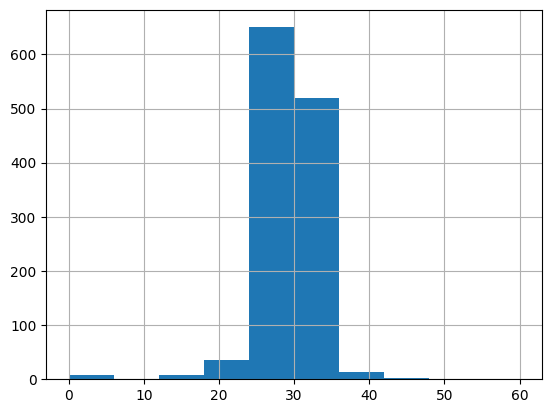

Number of null values: 0
count    1240.000000
mean       27.988306
std         3.784988
min         0.000000
25%        27.000000
50%        28.000000
75%        30.000000
max        60.000000
Name: VacationDays, dtype: float64


In [88]:
df11.VacationDays.hist()
plt.show()
print(f'Number of null values: {df11.VacationDays.isnull().sum()}')
print(df11.VacationDays.describe())

### Data Inconsistency in VacationDays

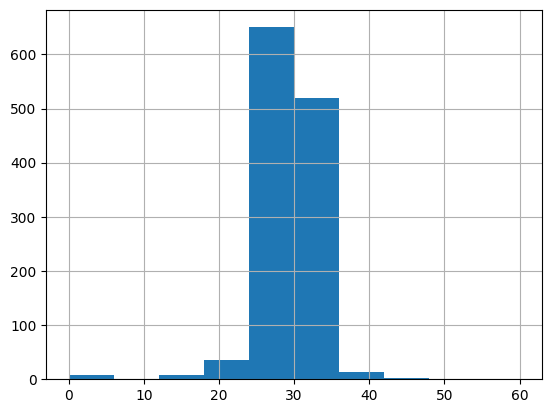

Number of null values: 0
count    1240.000000
mean       27.988306
std         3.784988
min         0.000000
25%        27.000000
50%        28.000000
75%        30.000000
max        60.000000
Name: VacationDays, dtype: float64


In [89]:
df11 = df11[(df11['VacationDays'] <= 60) | (df11['VacationDays'].isnull())]
df11.VacationDays.hist()
plt.show()
print(f'Number of null values: {df11.VacationDays.isnull().sum()}')
print(df11.VacationDays.describe())

In [90]:
df11['VacationDays'] = df11['VacationDays'].fillna(28)

In [91]:
df11.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 120
Other technologies/programming languages you use often     150
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
Employment status                                      

In [92]:
df12 = df11.copy()
df12[df12['LostJob'].isna() & df12['Company type'].isna() ]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing
278,24/11/2020 15:07,28.0,Male,Berlin,Frontend Developer,8.0,5.0,Senior,Javascript,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,java,None,1,1
356,24/11/2020 18:16,25.0,Male,Berlin,Backend Developer,5.0,0.0,Senior,Java,Python,...,NaN,NaN,NaN,NaN,0.0,0.0,java,None,0,1
374,24/11/2020 18:50,30.0,Male,Samara,Backend Developer,2.0,0.0,Middle,php,"PHP, Javascript / Typescript, SQL",...,NaN,NaN,NaN,NaN,0.0,0.0,php,None,1,1
668,25/11/2020 19:02,21.0,Female,Cologne,Mobile Developer,2.0,2.0,Middle,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1,1
702,25/11/2020 23:20,32.0,Male,Paris,DevOps,12.0,3.0,Senior,NaN,NaN,...,English,1000+,NaN,NaN,0.0,0.0,NaN,NaN,1,1
758,26/11/2020 14:37,27.0,Male,Bucharest,QA Engineer,1.0,0.0,Junior,Javascript,Javascript / Typescript,...,NaN,NaN,NaN,NaN,0.0,0.0,java,None,1,1
837,27/11/2020 14:45,27.0,Male,Berlin,ML Engineer,5.0,1.0,Senior,Python,Google Cloud,...,NaN,NaN,NaN,NaN,0.0,0.0,python,None,1,1
1018,1/12/2020 15:57,41.0,Male,Berlin,Designer (UI/UX),20.0,0.0,Senior,Php,"PHP, Javascript / Typescript, SQL",...,English,NaN,NaN,NaN,0.0,0.0,php,None,1,1


## The above case is a MCAR since we can see many missing values in many columns in the same rows

In [93]:

df12 = df12.drop([278, 356,374, 375,668,702,758,837,1018])

In [94]:
df12[df12['LostJob'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing
19,24/11/2020 11:21,34.0,Male,Berlin,DevOps,13.0,5.000000,Senior,NaN,NaN,...,English,1000+,Product,NaN,0.0,0.0,NaN,NaN,1,0
42,24/11/2020 11:30,33.0,Female,Berlin,Software Engineer,12.0,5.000000,Senior,Ð¡#,"Python, C/C++, Javascript / Typescript, .NET, SQL",...,English,1000+,Product,NaN,0.0,0.0,None,None,0,0
63,24/11/2020 11:38,38.0,Male,Stuttgart,Hardware Engineer,15.0,5.000000,Lead,Hardware,NaN,...,English,1000+,Product,NaN,0.0,0.0,hardware,None,1,0
305,24/11/2020 16:14,35.0,Male,Berlin,Software Engineer,8.0,1.000000,Senior,Elixir,Erlang,...,English,101-1000,Startup,NaN,0.0,1500.0,elixir,None,1,0
386,24/11/2020 19:09,25.0,Male,Berlin,Backend Developer,5.0,0.000000,Middle,Java,"Python, Kotlin, Java / Scala, SQL, AWS, Google...",...,English,1000+,Startup,NaN,0.0,0.0,java,None,1,0
488,25/11/2020 9:04,31.0,Male,Berlin,Software Engineer,10.0,4.000000,Lead,Python,"AWS, Docker",...,English,101-1000,Startup,NaN,0.0,0.0,python,None,1,0
666,25/11/2020 18:59,33.0,Male,Berlin,ML Engineer,10.0,6.000000,Senior,NaN,"Python, Java / Scala",...,English,1000+,Product,NaN,0.0,0.0,java,NaN,1,1
898,29/11/2020 19:42,24.0,Male,Berlin,ML Engineer,3.0,3.691928,Senior,NaN,NaN,...,NaN,NaN,Startup,NaN,0.0,0.0,NaN,NaN,1,1


In [95]:
cat_cols = ['Company type', 'Company size','City']
num_col = 'LostJob'

# Create a missingness indicator variable for the numerical column
df11['{}_missing'.format(num_col)] = df11[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df11[col], df11['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Company type and LostJob:
chi2: 4.9792, p-value: 1.0000, degrees of freedom: 62
Chi-square test for independence between Company size and LostJob:
chi2: 5.9335, p-value: 0.2042, degrees of freedom: 4
Chi-square test for independence between City and LostJob:
chi2: 201.4414, p-value: 0.0000, degrees of freedom: 119


### From the the chi sqaure test we can see theres an association between City and LostJob so we can use K means Mode Imputation

In [96]:
df12[(df12['City'] == 'Berlin')].mode()

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,Main language at work,Company size,Company type,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing
0,24/11/2020 11:44,30.0,Male,Berlin,Software Engineer,10.0,1.0,Senior,Java,Javascript / Typescript,...,English,1000+,Product,No,0.0,0.0,java,,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df12['LostJob'] = df12['LostJob'].fillna('No')

In [98]:
df12.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 118
Other technologies/programming languages you use often     147
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
Employment status                                      

In [99]:

df12 = df12.rename(columns={'Main language at work': 'MainLanguage'})
df12 = df12.rename(columns={'Ð¡ontract duration': 'Ð¡ontractDuration'})
df12 = df12.rename(columns={'Employment status': 'EmploymentStatus'})
df12 = df12.rename(columns={'Company size': 'CompanySize'})
df12 = df12.rename(columns={'Company type': 'CompanyType'})



In [100]:
df12.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 118
Other technologies/programming languages you use often     147
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
EmploymentStatus                                       

## Missing Values of Employment Status

In [101]:
df12[df12['EmploymentStatus'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,MainLanguage,CompanySize,CompanyType,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing
165,24/11/2020 12:23,28.0,Male,Moldova,Backend Developer,4.0,0.000000,Middle,Java,"Kotlin, Java / Scala",...,English,51-100,Startup,Yes,0.0,0.0,java,,1,1
544,25/11/2020 11:56,31.0,Male,Hamburg,Data Scientist,9.0,9.000000,Middle,Python,"Python, Docker",...,German,up to 10,Product,No,0.0,0.0,python,None,0,0
567,25/11/2020 13:37,28.0,Male,Berlin,DevOps,10.0,7.000000,Lead,NaN,AWS,...,English,101-1000,Product,No,0.0,0.0,aws,NaN,1,1
898,29/11/2020 19:42,24.0,Male,Berlin,ML Engineer,3.0,3.691928,Senior,NaN,NaN,...,NaN,NaN,Startup,No,0.0,0.0,NaN,NaN,1,1
1101,8/12/2020 0:04,31.0,Male,Frankfurt,Product Manager,8.0,5.000000,Lead,NaN,NaN,...,NaN,1000+,Product,No,0.0,0.0,NaN,NaN,0,0
1218,14/01/2021 1:14,31.0,Female,Berlin,Data Scientist,4.0,3.000000,Middle,spark,"Python, SQL, AWS",...,English,1000+,Product,No,0.0,500.0,spark,None,1,0
1221,16/01/2021 19:35,32.0,Female,Munich,QA Engineer,8.0,5.000000,Senior,Java,Java / Scala,...,German,Nov-50,Product,No,0.0,0.0,java,None,1,1


In [102]:
cat_cols = ['LostJob', 'CompanyType','CompanySize']
num_col = 'EmploymentStatus'

# Create a missingness indicator variable for the numerical column
df12['{}_missing'.format(num_col)] = df12[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df12[col], df12['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between LostJob and EmploymentStatus:
chi2: 1.3388, p-value: 0.9982, degrees of freedom: 9
Chi-square test for independence between CompanyType and EmploymentStatus:
chi2: 1.5588, p-value: 1.0000, degrees of freedom: 62
Chi-square test for independence between CompanySize and EmploymentStatus:
chi2: 2.3938, p-value: 0.6637, degrees of freedom: 4


## So the Employment Status has no association with the respected we assumed may have so can't use any imputation method for it, either we can delete it or use mode for, since these are only 7 rows we can afford the deletion method

In [103]:
df13 = df12.copy()
df13 = df13.dropna(subset=['EmploymentStatus'])

In [104]:
df13.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 115
Other technologies/programming languages you use often     145
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
EmploymentStatus                                       

## Missing values of Main Language

In [105]:
df13[df13['MainLanguage'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,CompanySize,CompanyType,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing,EmploymentStatus_missing
55,24/11/2020 11:33,33.0,Male,Munich,DevOps,15.000000,4.000000,Lead,Kubernetes,"AWS, Google Cloud, Azure, Docker",...,101-1000,Product,No,0.0,0.0,.net,None,0,0,0
183,24/11/2020 12:38,47.0,Male,Munich,DevOps,20.000000,1.000000,Senior,NaN,"PHP, SQL, AWS, Azure, Kubernetes, Docker",...,1000+,Product,No,0.0,0.0,.net,NaN,1,0,0
863,27/11/2020 21:36,29.0,Male,Milan,Data Scientist,3.000000,0.000000,Middle,Python,"Python, SQL",...,Nov-50,Startup,No,0.0,0.0,python,None,0,0,0
1238,25/11/2020 21:10,37.0,Male,Stuttgart,Backend Developer,11.898813,3.691928,Senior,C#,NaN,...,NaN,NaN,No,0.0,0.0,c#,None,1,0,0


In [106]:
cat_cols = ['Position ', 'CompanyType','City']
num_col = 'MainLanguage'

# Create a missingness indicator variable for the numerical column
df13['{}_missing'.format(num_col)] = df13[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df13[col], df13['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Position  and MainLanguage:
chi2: 23.0110, p-value: 1.0000, degrees of freedom: 149
Chi-square test for independence between CompanyType and MainLanguage:
chi2: 0.7817, p-value: 1.0000, degrees of freedom: 62
Chi-square test for independence between City and MainLanguage:
chi2: 198.6166, p-value: 0.0000, degrees of freedom: 116


## We can see there is no association between any other categorical value with Main Language so this is not the case of MAR and instead we will have to use some other method to fill missing values, according to the nature of the data it is safe to use mode for it

In [107]:
mode_value = df13['MainLanguage'].mode()[0]
df13['MainLanguage'] = df13['MainLanguage'].fillna(mode_value)

In [108]:
df13.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 115
Other technologies/programming languages you use often     145
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
EmploymentStatus                                       

In [109]:
df13[df13['CompanySize'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,CompanyType,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing,EmploymentStatus_missing,MainLanguage_missing
471,25/11/2020 7:38,28.0,Male,Berlin,Frontend Developer,6.000000,1.000000,Senior,JavaScript,"Javascript / Typescript, Docker",...,NaN,No,0.0,0.0,java,None,0,0,0,0
521,25/11/2020 10:58,32.0,Male,Berlin,Software Engineer,15.000000,3.691928,Senior,Java,NaN,...,NaN,No,0.0,0.0,java,None,0,1,0,0
819,27/11/2020 12:33,32.0,Male,Hamburg,Software Engineer,12.000000,12.000000,Senior,Java,"Python, Kotlin, Javascript / Typescript, Java ...",...,Consulting / Agency,No,0.0,0.0,java,None,1,0,0,0
1231,24/11/2020 11:33,32.0,Male,Berlin,Software Engineer,8.448475,1.000000,Senior,PHP,NaN,...,NaN,No,0.0,0.0,php,None,1,1,0,0
1233,24/11/2020 17:40,32.0,Male,Hamburg,Support Engineer,8.448475,2.000000,Senior,NaN,"Kubernetes, Docker",...,NaN,No,0.0,100.0,.net,NaN,1,0,0,0
1238,25/11/2020 21:10,37.0,Male,Stuttgart,Backend Developer,11.898813,3.691928,Senior,C#,NaN,...,NaN,No,0.0,0.0,c#,None,1,0,0,1


In [110]:
cat_cols = ['Position ', 'CompanyType']
num_col = 'CompanySize'

# Create a missingness indicator variable for the numerical column
df13['{}_missing'.format(num_col)] = df13[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df13[col], df13['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Position  and CompanySize:
chi2: 104.8480, p-value: 0.9976, degrees of freedom: 149
Chi-square test for independence between CompanyType and CompanySize:
chi2: 7.6563, p-value: 1.0000, degrees of freedom: 62


## According to the test there is no association with the assumed columns so this is not the case of MAR instead it is the case of MNAR, which calls for improving the dataset which we can't do so will have to just delete these rows

In [111]:
df14 = df13.copy()
df14 = df14.dropna(subset=['CompanySize'])

In [112]:
df14.isnull().sum()

Timestamp                                                    0
Age                                                          0
Gender                                                       0
City                                                         0
Position                                                     0
Experience                                                   0
Germany_Experience                                           0
Seniority level                                              0
Technology                                                 114
Other technologies/programming languages you use often     142
YearlySalary                                                 0
YearlyBonus                                                  0
LastAnnualSalary                                             0
LastAnnualBonus                                              0
VacationDays                                                 0
EmploymentStatus                                       

In [113]:
df14[df14['CompanyType'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,LostJob,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing,EmploymentStatus_missing,MainLanguage_missing,CompanySize_missing
263,24/11/2020 14:37,33.0,Male,Berlin,Backend Developer,12.000000,2.000000,Senior,PHP,"SQL, Go, AWS, Docker",...,No,0.0,0.0,php,None,1,0,0,0,0
401,24/11/2020 20:00,40.0,Male,Berlin,Architect,10.000000,3.000000,Middle,NaN,"Python, R, Go",...,No,0.0,0.0,python,NaN,0,0,0,0,0
426,24/11/2020 20:43,27.0,Female,Berlin,Backend Developer,3.000000,1.000000,Middle,NaN,NaN,...,No,32.0,0.0,NaN,NaN,1,0,0,0,0
519,25/11/2020 10:56,28.0,Female,Berlin,Data Scientist,4.000000,4.000000,Middle,Python,"Python, SQL, Docker",...,No,0.0,1000.0,python,None,0,0,0,0,0
866,27/11/2020 22:20,26.0,Male,Berlin,Data Scientist,2.000000,1.000000,Junior,Pyrhon,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",...,No,0.0,600.0,python,None,0,0,0,0,0
889,29/11/2020 12:27,32.0,Male,Berlin,Software Engineer,10.000000,10.000000,Senior,.net,".NET, SQL, Azure",...,No,0.0,0.0,.net,None,1,0,0,0,0
1188,28/12/2020 12:00,36.0,Male,Stuttgart,Lead Developer,8.000000,2.000000,Lead,.net,"Javascript / Typescript, .NET, SQL, Azure, Kub...",...,No,0.0,0.0,.net,None,0,0,0,0,0
1230,24/11/2020 11:18,32.0,Male,Berlin,Software Engineer,8.448475,3.691928,Lead,PHP,NaN,...,No,0.0,1000.0,php,None,0,1,0,0,0


In [114]:
cat_cols = ['Position ', 'City','Gender']
num_col = 'CompanyType'

# Create a missingness indicator variable for the numerical column
df14['{}_missing'.format(num_col)] = df14[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df14[col], df14['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Position  and CompanyType:
chi2: 309.4485, p-value: 0.0000, degrees of freedom: 149
Chi-square test for independence between City and CompanyType:
chi2: 9.4040, p-value: 1.0000, degrees of freedom: 116
Chi-square test for independence between Gender and CompanyType:
chi2: 0.5748, p-value: 0.7502, degrees of freedom: 2


### there is an association between Position and Company type so we can use it to impute the missing value for the Company Type

In [115]:
df14[((df14['Position '] == 'Backend Developer') | (df14['Position '] == 'Data Scientist')| (df14['Position '] == 'Software Engineer')) & (df14['CompanyType'].isna()) ].mode()

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,Technology,Other technologies/programming languages you use often,...,HoursPerWeek,AdditonalSupport,Tech1,Tech2,YearlyBonus_missing,VacationDays_missing,EmploymentStatus_missing,MainLanguage_missing,CompanySize_missing,CompanyType_missing
0,24/11/2020 11:18,32.0,Male,Berlin,Backend Developer,2.000000,1.0,Middle,PHP,".NET, SQL, Azure",...,0.0,0.0,php,NaN,0.0,0.0,0.0,0.0,0.0,1.0
1,24/11/2020 14:37,NaN,NaN,NaN,Data Scientist,3.000000,NaN,Senior,NaN,"Python, SQL, AWS, Google Cloud, Kubernetes, Do...",...,NaN,NaN,python,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,24/11/2020 20:43,NaN,NaN,NaN,Software Engineer,4.000000,NaN,NaN,NaN,"Python, SQL, Docker",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/11/2020 10:56,NaN,NaN,NaN,NaN,8.448475,NaN,NaN,NaN,"SQL, Go, AWS, Docker",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27/11/2020 22:20,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29/11/2020 12:27,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df15 = df14.copy()
df15 = df15.drop('VacationDays_missing', axis=1)
df15 = df15.drop('EmploymentStatus_missing', axis=1)
df15 = df15.drop('MainLanguage_missing', axis=1)
df15 = df15.drop('CompanySize_missing', axis=1)
df15 = df15.drop('CompanyType_missing', axis=1)
df15 = df15.drop('Technology', axis=1)
df15 = df15.drop('Tech2', axis=1)
df15 = df15.drop('Other technologies/programming languages you use often', axis=1)


### In the above dropped columns apart from the self introduced ones, the other columns weren't useful for once, the reason is they had too many missing values to be handled, and second the information they were providing was already provided by our other column in the dataset

In [117]:
df15.isnull().sum()

Timestamp               0
Age                     0
Gender                  0
City                    0
Position                0
Experience              0
Germany_Experience      0
Seniority level         0
YearlySalary            0
YearlyBonus             0
LastAnnualSalary        0
LastAnnualBonus         0
VacationDays            0
EmploymentStatus        0
Ð¡ontractDuration      12
MainLanguage            0
CompanySize             0
CompanyType             8
LostJob                 0
HoursPerWeek            0
AdditonalSupport        0
Tech1                  60
YearlyBonus_missing     0
dtype: int64

In [118]:
df15[df15['Ð¡ontractDuration'].isna()]

,Timestamp,Age,Gender,City,Position,Experience,Germany_Experience,Seniority level,YearlySalary,YearlyBonus,...,EmploymentStatus,Ð¡ontractDuration,MainLanguage,CompanySize,CompanyType,LostJob,HoursPerWeek,AdditonalSupport,Tech1,YearlyBonus_missing
6,24/11/2020 11:16,37.0,Male,Berlin,Frontend Dev,6.0,0.4,Middle,57000.0,0.0,...,Full-time employee,NaN,English,Nov-50,Product,No,0.0,0.0,java,1
245,24/11/2020 14:13,38.0,Male,Frankfurt,Tech Lead,16.0,1.0,Lead,99000.0,112000.0,...,Full-time employee,NaN,English,101-1000,Fintech,No,0.0,0.0,.net,0
390,24/11/2020 19:15,33.0,Male,Berlin,Product Manager,5.0,5.0,Senior,70000.0,800.0,...,Full-time employee,NaN,German,101-1000,Product,No,0.0,0.0,python,0
424,24/11/2020 20:41,30.0,Female,Berlin,QA Engineer,4.0,1.0,Middle,52000.0,0.0,...,Full-time employee,NaN,English,51-100,Startup,No,0.0,0.0,java,1
566,25/11/2020 13:26,24.0,Male,Munich,Data Scientist,1.0,1.0,Junior,300000.0,0.0,...,Full-time employee,NaN,English,101-1000,Startup,No,10.0,0.0,c++,1
694,25/11/2020 22:05,41.0,Male,Berlin,Software Engineer,18.0,3.0,Senior,120000.0,0.0,...,Self-employed (freelancer),NaN,English,up to 10,Startup,No,0.0,0.0,java,1
707,25/11/2020 23:57,33.0,Male,Berlin,Backend Developer,10.0,10.0,Head,93000.0,0.0,...,Full-time employee,NaN,English,101-1000,Startup,No,0.0,200.0,NaN,1
1012,1/12/2020 12:47,26.0,Male,Berlin,QA Engineer,4.0,1.0,Middle,55500.0,0.0,...,Full-time employee,NaN,English,51-100,Startup,No,32.0,400.0,swift,1
1088,7/12/2020 7:09,40.0,Male,Munich,Data Engineer,15.0,7.0,Lead,90000.0,10000.0,...,Full-time employee,NaN,English,101-1000,Product,No,32.0,0.0,sql,0
1089,7/12/2020 8:28,27.0,Female,Berlin,Data Scientist,5.0,2.0,Senior,75000.0,0.0,...,Full-time employee,NaN,English,101-1000,Product,No,0.0,0.0,python,0


In [119]:
cat_cols = ['Position ', 'EmploymentStatus','City']
num_col = 'Ð¡ontractDuration'

# Create a missingness indicator variable for the numerical column
df15['{}_missing'.format(num_col)] = df15[num_col].isna().astype(int)

# Create a contingency table of the categorical and missingness indicator variables for each categorical column
cont_tables = {}
for col in cat_cols:
    cont_table = pd.crosstab(df15[col], df15['{}_missing'.format(num_col)])
    cont_tables[col] = cont_table

# Conduct the chi-square test for independence for each categorical column
for col, cont_table in cont_tables.items():
    chi2, p, dof, expected = chi2_contingency(cont_table)
    print('Chi-square test for independence between {} and {}:'.format(col, num_col))
    print('chi2: {:.4f}, p-value: {:.4f}, degrees of freedom: {}'.format(chi2, p, dof))


Chi-square test for independence between Position  and Ð¡ontractDuration:
chi2: 161.5359, p-value: 0.2281, degrees of freedom: 149
Chi-square test for independence between EmploymentStatus and Ð¡ontractDuration:
chi2: 13.7047, p-value: 0.3200, degrees of freedom: 12
Chi-square test for independence between City and Ð¡ontractDuration:
chi2: 4.1195, p-value: 1.0000, degrees of freedom: 116


### We can see there is no association between the Position, Employment Status and Ð¡ontract Duration which means we dont have MAR missing values so we can't impute them so we have a choice to either delete the rows or fill it with mode 

In [120]:
mode_value = df15['Ð¡ontractDuration'].mode()[0]
df15['Ð¡ontractDuration'] = df15['Ð¡ontractDuration'].fillna(mode_value)

In [121]:
df15.isnull().sum()

Timestamp                     0
Age                           0
Gender                        0
City                          0
Position                      0
Experience                    0
Germany_Experience            0
Seniority level               0
YearlySalary                  0
YearlyBonus                   0
LastAnnualSalary              0
LastAnnualBonus               0
VacationDays                  0
EmploymentStatus              0
Ð¡ontractDuration             0
MainLanguage                  0
CompanySize                   0
CompanyType                   8
LostJob                       0
HoursPerWeek                  0
AdditonalSupport              0
Tech1                        60
YearlyBonus_missing           0
Ð¡ontractDuration_missing     0
dtype: int64

## Missing Values in Tech1 column, this is a column which has a significant number of missing values and its unique values are very large so deleting the rows or applying on it both are not feasible for it so we can introduce a new value as "Other" to fill the missing values for this which also seems a logical replacement for it

In [122]:
df15['Tech1'] = df15['Tech1'].fillna('Other')

In [123]:
df15 = df15.drop('Ð¡ontractDuration_missing', axis=1)

In [124]:
df15.isnull().sum()

Timestamp              0
Age                    0
Gender                 0
City                   0
Position               0
Experience             0
Germany_Experience     0
Seniority level        0
YearlySalary           0
YearlyBonus            0
LastAnnualSalary       0
LastAnnualBonus        0
VacationDays           0
EmploymentStatus       0
Ð¡ontractDuration      0
MainLanguage           0
CompanySize            0
CompanyType            8
LostJob                0
HoursPerWeek           0
AdditonalSupport       0
Tech1                  0
YearlyBonus_missing    0
dtype: int64

In [125]:
## Cleaning Seniority Level
df15['Seniority_level'] = df15['Seniority level'].str.title().str.strip()
df15=df15.replace({'Seniority level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior','No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior', 'Na':'Junior','C-level':'Senior','C-Level':'Senior','Working Student':'Junior',
                                                                       'Entry Level':'Junior','No level':'Junior','No level ':'Junior','VP':'Senior','CTO':'Senior','Entry level':'Senior',
                                                                       'no idea, there are no ranges in the firm ':'Middle','C-level executive manager':'Senior','intern':'Junior','Intern':'Junior','student':'Junior','Self employed':'Senior'}})

In [126]:
df15['Seniority level'].unique()

array(['Senior', 'Junior', 'Middle', 'Na'], dtype=object)

# Univariate Analysis

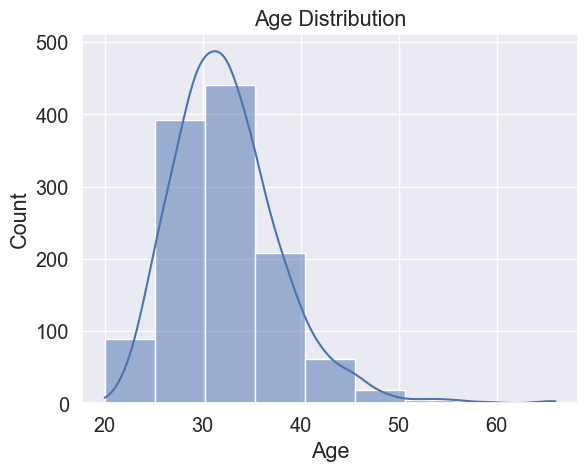

Age Descriptive Statistics


count    1218.0
mean       33.0
std         6.0
min        20.0
25%        29.0
50%        32.0
75%        35.0
max        66.0
Name: Age, dtype: float64

In [127]:
df16 = df15.copy()
sns.set(font_scale=1.3)
plot=sns.histplot(df16.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
df16['Age'].describe().round()

### The age distribution of participants is skewed to the left, with the majority falling between the ages of 29 and 36.

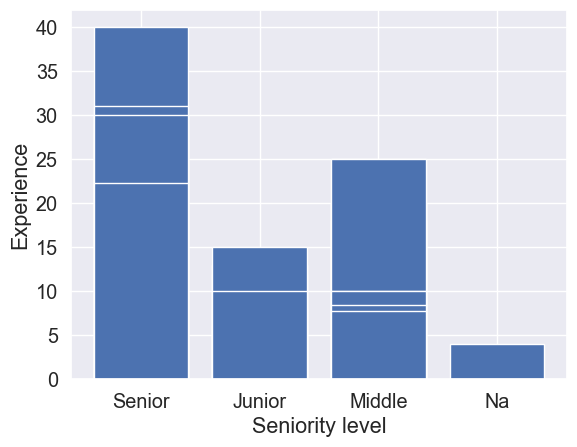

In [128]:
plt.bar(df16['Seniority level'], df16['Experience'])
plt.xlabel('Seniority level')
plt.ylabel('Experience')
plt.show()


### Typically, junior-level staff possess approximately one year of experience, while mid-level employees have around five years, and senior-level employees have about ten years of experience. Senior-level employees exhibit the greatest variability in terms of years of experience.

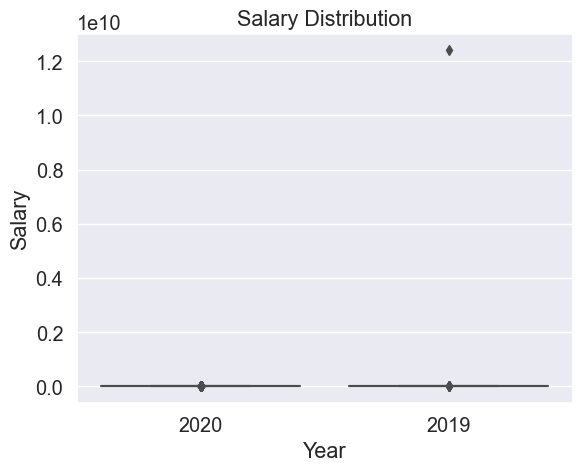

,YearlySalary,LastAnnualSalary
count,1218.0,1.218000e+03
mean,71037.0,1.022729e+07
std,24079.0,3.552471e+08
min,10001.0,0.000000e+00
25%,59000.0,0.000000e+00
50%,70000.0,5.800000e+04
75%,80000.0,7.200000e+04
max,300000.0,1.239812e+10


In [129]:
g=sns.boxplot(data=df16.loc[:,['YearlySalary','LastAnnualSalary']])
g.set_xticklabels(['2020', '2019'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

df16[['YearlySalary','LastAnnualSalary']].describe().round()

In [130]:
df16 = df16[(df16['LastAnnualSalary'] < 760000) ]

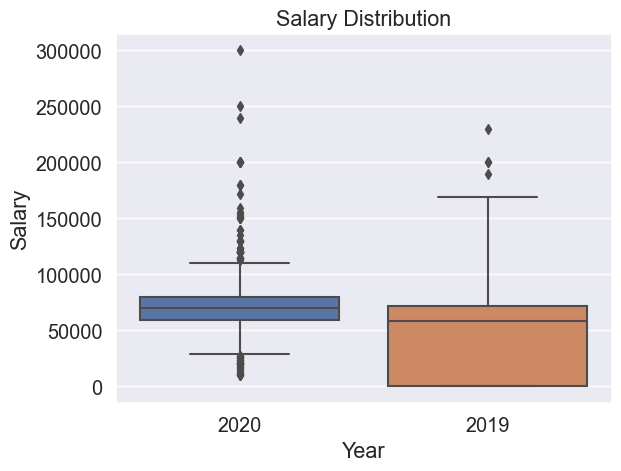

,YearlySalary,LastAnnualSalary
count,1216.0,1216.0
mean,71049.0,47663.0
std,24093.0,34871.0
min,10001.0,0.0
25%,59000.0,0.0
50%,70000.0,58000.0
75%,80000.0,72000.0
max,300000.0,230000.0


In [131]:
g=sns.boxplot(data=df16.loc[:,['YearlySalary','LastAnnualSalary']])
g.set_xticklabels(['2020', '2019'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

df16[['YearlySalary','LastAnnualSalary']].describe().round()

## So after removing the specfic outlier from the last year salary, we can finally see a better boxplots for both years in

### When comparing salaries between 2019 and 2020, it appears that there is a similar distribution with a slight increase in pay. In 2019, the majority of IT workers earned between 65,000 to 75,000 per year, while in 2020, the majority earned between 70,000 to 80,000 per year.

## Salary and Experience Relation

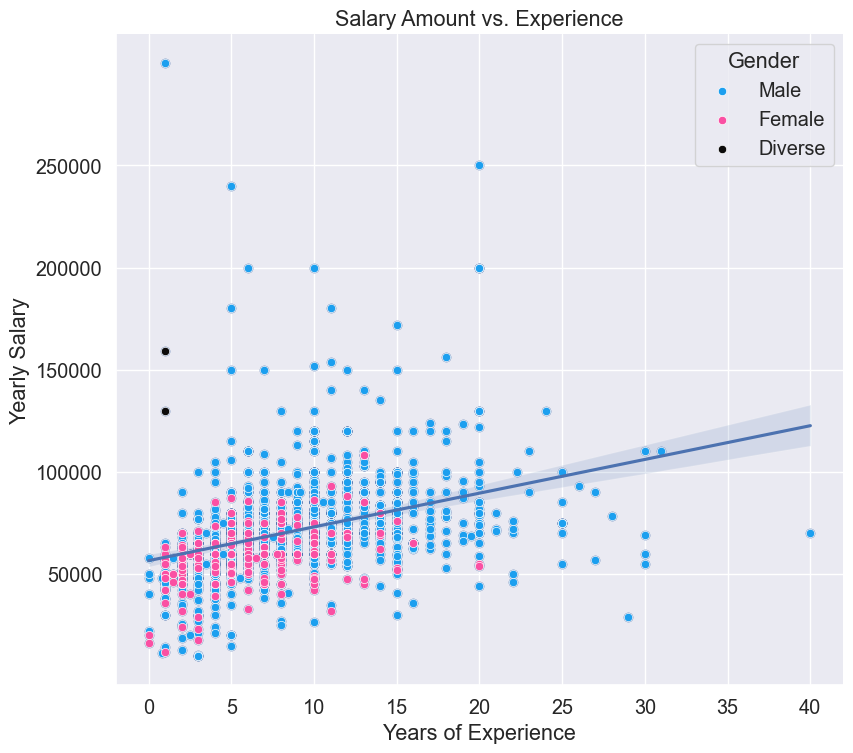

In [132]:
g = sns.FacetGrid(df16,hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"])
sns.regplot(x='Experience', y="YearlySalary", data=df16)
g=g.map(sns.scatterplot,'Experience',"YearlySalary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000])
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

g.axes[0,0].set_ylabel('Yearly Salary')
g.axes[0,0].set_xlabel('Years of Experience')
plt.title('Salary Amount vs. Experience')
plt.legend (title='Gender')
plt.show()

## So by the above scatter plot, if we rely on the linear regression we can infer that experience is directly positively proportional to the Salary, however it is not a strongly correlated scatter plot, as it is not densely along with the line so its a moderate positive correlation

## other than that we also have one more column data in this which is Gender, we see female don't have experience more than 17 years other than one outlier also there correlation with experience is not as strong as male, so there best fit alone will be lower with less gradient and less salary

In [133]:
df16 = df16.rename(columns={'Position ': 'Position'})
position=df16.Position.value_counts().reset_index().iloc[:11]
position=position.rename(columns={"index": "Position", "Position": "Count"})
position.drop([2], axis=0, inplace=True)

top10=[]
for x in position['Position']:
     if x not in top10:
        top10.append(x)
        
rslt_df = df16[df16['Position'].isin(top10)] 

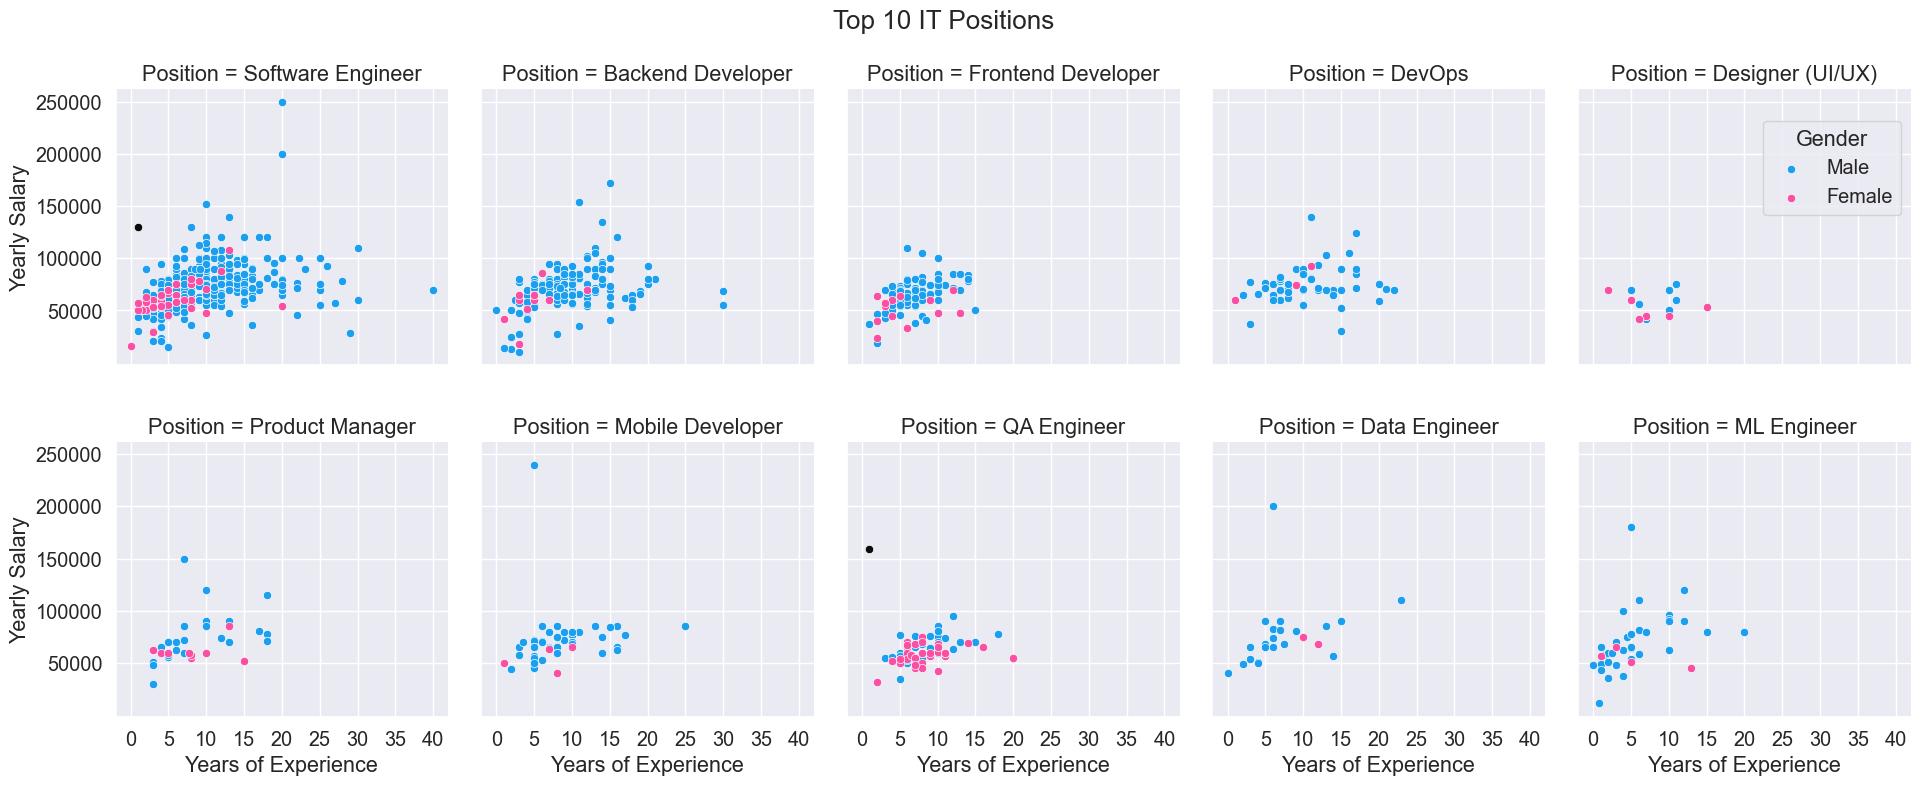

In [134]:
g = sns.FacetGrid(rslt_df, col='Position', hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"],col_wrap=5,)
g=g.map(sns.scatterplot,'Experience',"YearlySalary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000],xlabel='Years of Experience', ylabel='Yearly Salary')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.suptitle('Top 10 IT Positions',y=1.02)
plt.legend (loc='upper right',title='Gender',bbox_to_anchor=(1,2.2))

plt.show()

## As per the scatter plots of different positions we can say that two positions Software Engineer and Backend Develop have positive and stronger correlation between Salary and Experience, 
## FrontEnd Developer, Mobile Developer and QA Engineer have moderate positive correlation
## Product Manager, Data Engineer and ML Engineer have weak positive correlation
## Designer(UI/UX) have no relation

## YearlyBonus vs Stocks

In [135]:
df16 = df16.drop(df16[df16.LastAnnualBonus > 400000].index)

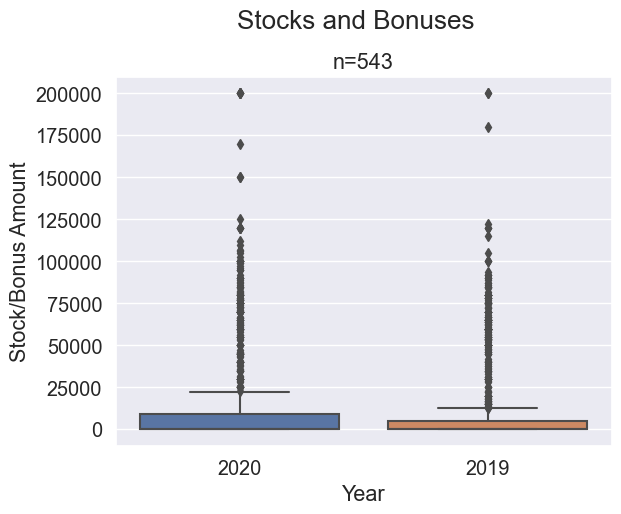

,YearlyBonus,LastAnnualBonus
count,1213.0,1213.0
mean,12761.0,10359.0
std,27871.0,24437.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,9000.0,5000.0
max,200000.0,200000.0


In [136]:
stocks=df16[df16['YearlyBonus'].notnull()]
stocks=stocks[stocks['LastAnnualBonus'].notnull()]

# stocks = stocks.drop(stocks[stocks.YearlyBonus == 'bvg only'].index)
# stocks = stocks.drop(stocks[stocks.LastAnnualBonus == 'learning budget, bvg, gym, food'].index)
# stocks = stocks.astype({'Yearly_bonus_and_stocks':'float','Bonus_and_stocks_last_year':'float'})
stock_drop = stocks.drop(stocks[stocks.YearlyBonus > 400000].index)

g=sns.boxplot(data=stock_drop.loc[:,['YearlyBonus','LastAnnualBonus']])
g.set_xticklabels(['2020', '2019'])
plt.suptitle("Stocks and Bonuses",y=1.02)
plt.title('n=543')
plt.ylabel('Stock/Bonus Amount')
plt.xlabel('Year')
plt.show()

#stocks[['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']].describe().round()
stock_drop[['YearlyBonus','LastAnnualBonus']].describe().round()

## So from the above box plot we can infer only 66% of the participants responded to the question regarding whether they received bonuses or stocks. Although the average value is consistent between 2019 and 2020, the 75th percentile and maximum values were higher in 2019.

## Cleaning city column

In [137]:
df16=df16.replace({'City': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
df16['City'] = df16['City'].str.title().str.strip()

df16=df16.replace({'City': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Kã¶Ln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg',
                                                            'Dusseldurf':'Dusseldorf','Dã¼Sseldorf':'Dusseldorf',
                                                            'Bã¶Lingen': 'Bollingen',  }})

In [138]:
df16['City'].unique()

array(['Munich', 'Berlin', 'Wolfsburg', 'Hamburg', 'Stuttgart',
       'Schleswig-Holstein', 'London', 'Konstanz Area', 'Frankfurt',
       'Cologne', 'Kempten', 'Mã¼Nster', 'Erlangen', 'Vienna',
       'Rosenheim', 'Mannheim', 'Boeblingen', 'Dusseldorf', 'Ingolstadt',
       'Nã¼Rnberg', 'Ansbach', 'Leipzig', 'Tuttlingen', 'Bonn', 'Moscow',
       'Koblenz', 'Warsaw', 'Heidelberg', 'Karlsruhe', 'Aachen',
       'Riga, Latvia', 'Zurich', 'Helsinki', 'Wã¼Rzburg', 'Kyiv',
       'The Haag', 'Amsterdam', 'Krakow', 'Tallinn', 'Prague', 'Utrecht',
       'Stockholm', 'Brunswick', 'Dresden', 'Malta', 'Lã¼Beck',
       'Nuremberg', 'Bodensee', 'Milan', 'Salzburg', 'Rome', 'Wroclaw',
       'Cupertino', 'Paris', 'Dublin', 'Paderborn', 'Konstanz', 'Ulm',
       'Barcelona', 'Bollingen', 'Tampere (Finland)', 'Hannover',
       'Siegen', 'Minsk', 'Da304', 'Marseille', 'Friedrichshafen',
       'Walldorf', 'Eindhoven', 'France', 'Regensburg', 'Warsaw, Poland',
       'Heilbronn', 'Dortmund', 'Jena

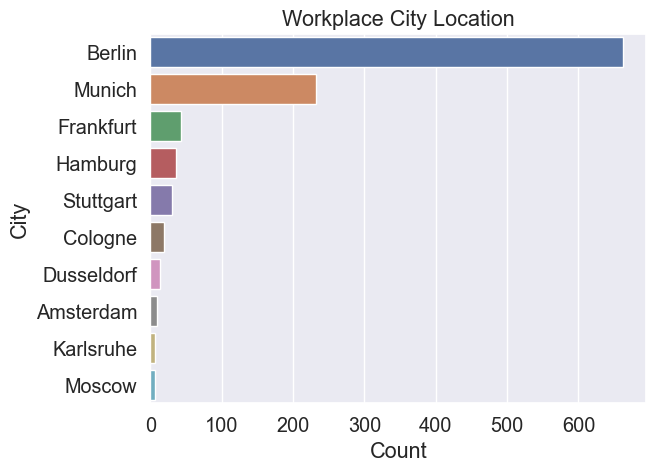

In [139]:
citydata=df16.City.value_counts().iloc[:10].to_frame().reset_index()
citydata=citydata.rename(columns={"index": "City", "City": "Count"})

sns.barplot(x=citydata["Count"],y=citydata["City"])
plt.title('Workplace City Location')
plt.show()

## So we can infer from the above bar that Berlin is the city where most of the employees work

In [140]:
df16['MainLanguage'] = df16['MainLanguage'].str.replace('Deutsch', 'German')
df16=df16.replace({'MainLanguage': {'English and German': 'Multiple', 'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple','Russian, English':'Multiple'}})

In [141]:
df16['Tech1'] = df16['Tech1'].str.title().str.strip()

In [142]:
df16['Tech1'] = df16['Tech1'].replace('NotMentioned', 'Not Mentioned')

## Most used Program Languages

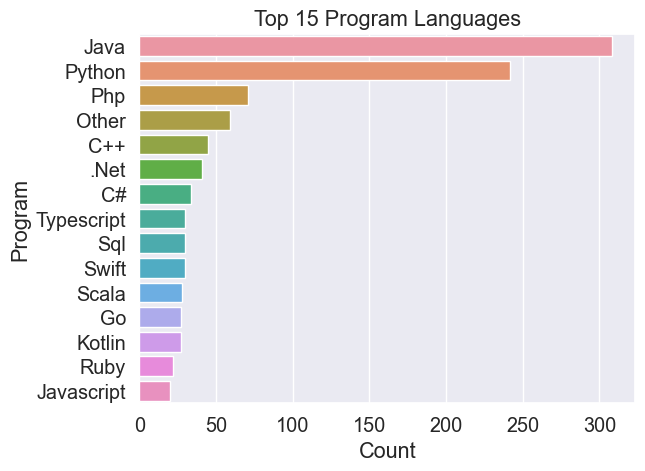

In [143]:
programdata=df16["Tech1"].value_counts().iloc[:15].reset_index()
programdata=programdata.rename(columns={"index": "Program", "Tech1": "Count"})
sns.barplot(data=programdata, y="Program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()

### So we can see that Java is the most used language among the Employees 

## Salaries according to the Programming Languages

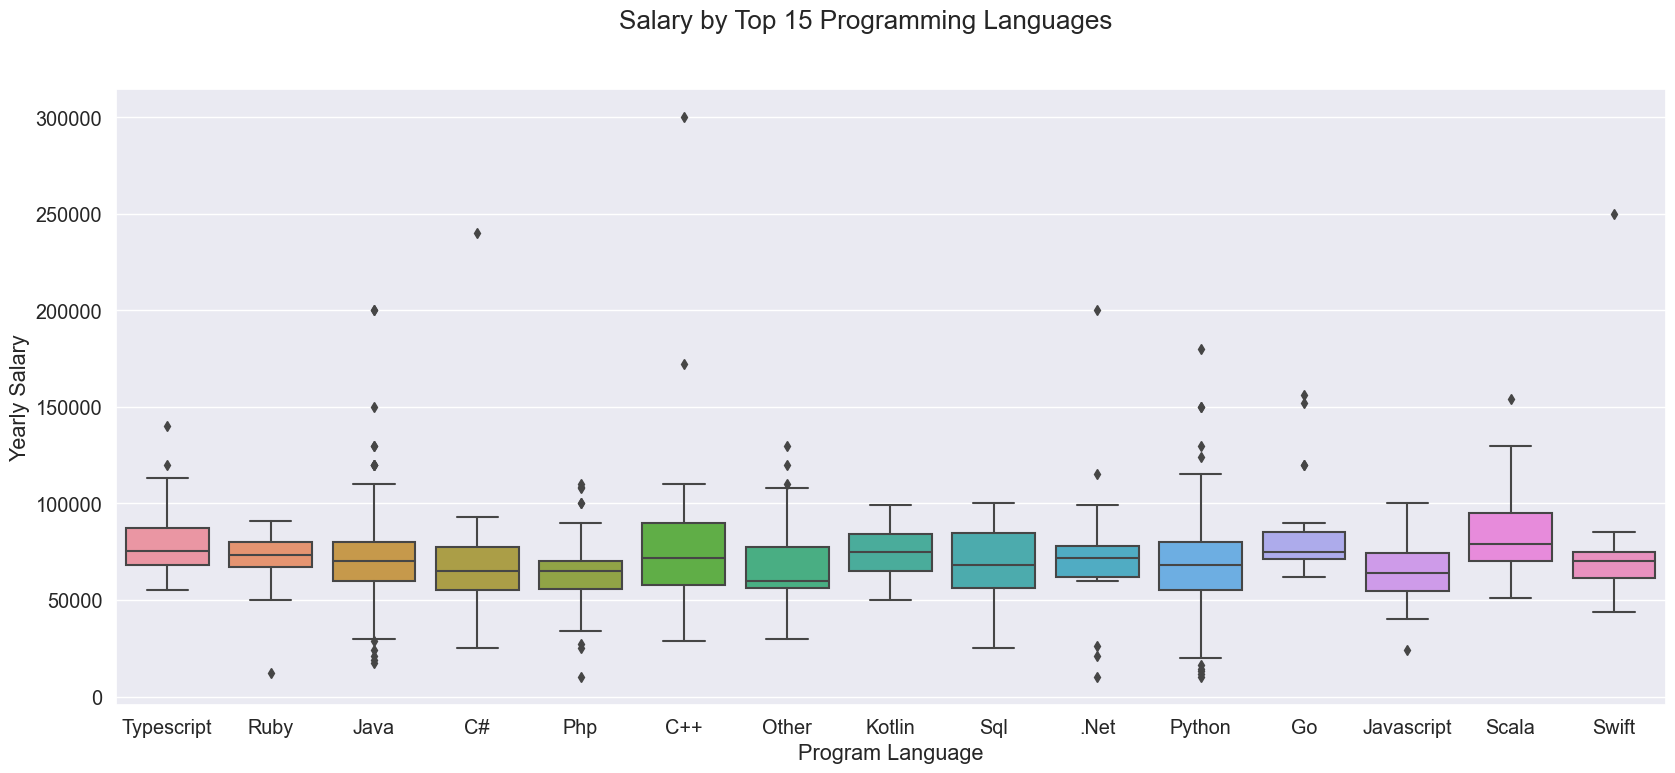

In [144]:
pr_top=[]
for x in programdata['Program']:
     if x not in pr_top:
        pr_top.append(x)
        
pr_df = df16[df16['Tech1'].isin(pr_top)] 
sns.boxplot(data=pr_df, x="Tech1", y="YearlySalary")
plt.xlabel('Program Language')
plt.ylabel('Yearly Salary')
plt.gcf().set_size_inches(20, 8)
plt.suptitle('Salary by Top 15 Programming Languages')
plt.show()

### So from the above boxplots of different languages against salary we can infer that Java language as the most anomalies, as it has some employees who are paid very less and those are not outliers, other than that we can also read that almost all of them are concentrated some where between 6000-9000 collectively.
### Also some of the programming languages have highly skewed distribution such as programming languages which are not mentioned, .Net, Go and Swift

In [145]:
## Cleaning COVID column 
df16=df16.replace({'LostJob': {'i didn\'t but will be looking for new one because of covid': 'No','Laid Off':'No',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
                                                                      'Leads and project inquiries have slowed down':'No',
                                                                      'Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Laid Off'}})

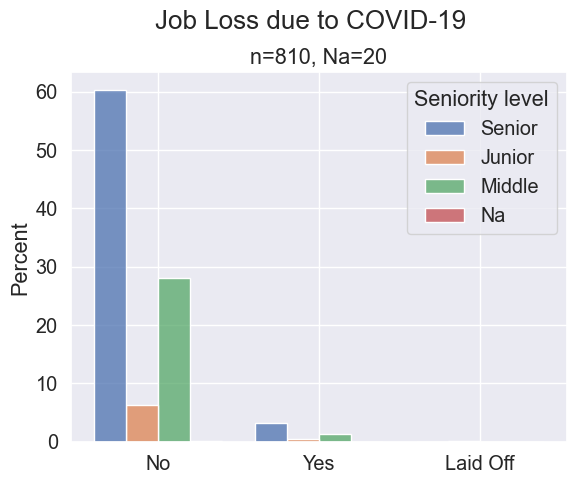

In [146]:
sns.histplot(df16, x="LostJob", stat="percent", multiple="dodge", shrink=.8, hue='Seniority level')
plt.suptitle('Job Loss due to COVID-19',y=1.01)
plt.title('n=810, Na=20')
plt.xlabel('')
plt.show()

<font size = "3">The COVID-19 pandemic resulted in approximately 5% of participants losing their jobs, while the majority were able to maintain their employment. So the above plot describes that 60% Senior Employees, 38% Middle Employees, 5% Junior Employees didn't lose their job, however 2% of the Senior Employees, 1% of the Middle Employees and 0.5% of Junior Employees lost their job

In [148]:
df16 = df16.drop('YearlyBonus_missing', axis=1)

# Bi-Variate Analysis

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\4109047792.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df16.corr()


<AxesSubplot: >

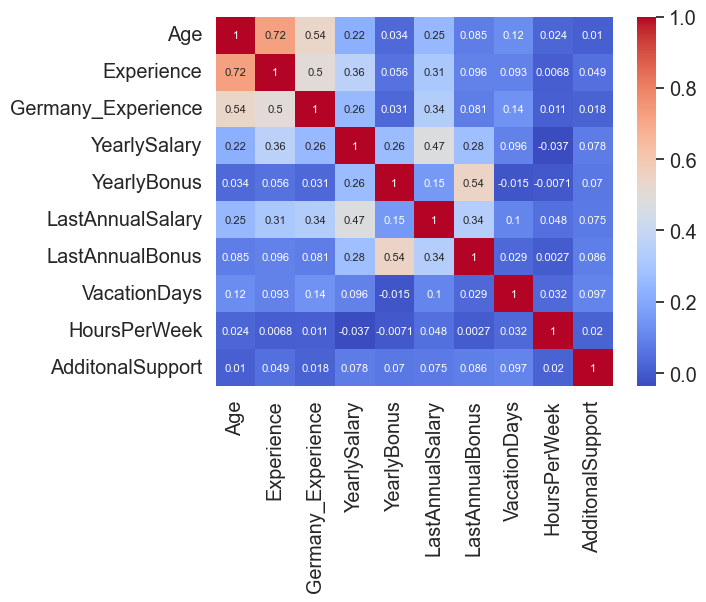

In [149]:
corr_matrix = df16.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True,annot_kws={"size": 8})

## Although we have already used correlation map before in our notebook, but to explain it further we can see that only few columns have correlation with other values such as Age with Experience, Last Annual Salary with Yearly Salary, Last Annual Bonus with Yearly Bonus as they have a significant correlation value among them, whereas all others have neglible correlation between which also shows why we were not able to impute at many places for missing values

# ANOVA tests

In [185]:
# Anova test on YearlySalary and LastAnnualSalary
cols = ['YearlySalary', 'LastAnnualSalary']

# Apply the ANOVA test on the selected columns
f_statistic, p_value = f_oneway(*[df14[col] for col in cols])

# Print the results
print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  0.9955273244031541
P-Value:  0.3184943699309133


##### The p-value is greater than 0.05, indicating that that the two columns are not significantly different and may be considered as having similar means, so we can conclude that there hasn't been a significant rise in bonus over the years.

In [187]:
# Anova test on YearlyBonus and LastAnnualBonus
cols = ['YearlyBonus', 'LastAnnualBonus']

# Apply the ANOVA test on the selected columns
f_statistic, p_value = f_oneway(*[df14[col] for col in cols])

# Print the results
print("F-Statistic: ", f_statistic)
print("P-Value: ", p_value)

F-Statistic:  0.9965952117930881
P-Value:  0.31823500493367096


##### The p-value is greater than 0.05, indicating that that the two columns are not significantly different and may be considered as having similar means, so we can conclude that there hasn't been a significant rise in bonus over the years.

In [161]:
df16['Position'] = df16['Position'].str.title().str.strip()

counts_2020=df16.Position.value_counts()
cutoff1=3
cutoff1_keep= list(counts_2020[counts_2020.values>=cutoff1].index)
df16['Position'] = df16['Position'].where(df16['Position'].isin(cutoff1_keep), 'Other')

# Categorical - Numerical Analysis

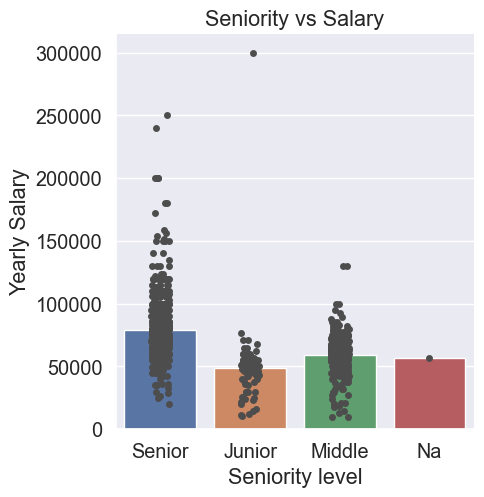

In [167]:
# Plot categorical mean and distribution
sns.catplot(x="Seniority level", y="YearlySalary", data=df16, kind="bar", errorbar=None)
sns.stripplot(x="Seniority level", y="YearlySalary", data=df16, color=".3")

# Add labels and title
plt.xlabel("Seniority level")
plt.ylabel("Yearly Salary")
plt.title("Seniority vs Salary")
plt.show()

## From the above bi variate plot we can infer that higher the level, more the salary and anamolies in the column

# Position vs Yearly Salary

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\269244700.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df16.groupby(['Position']).sum().copy()


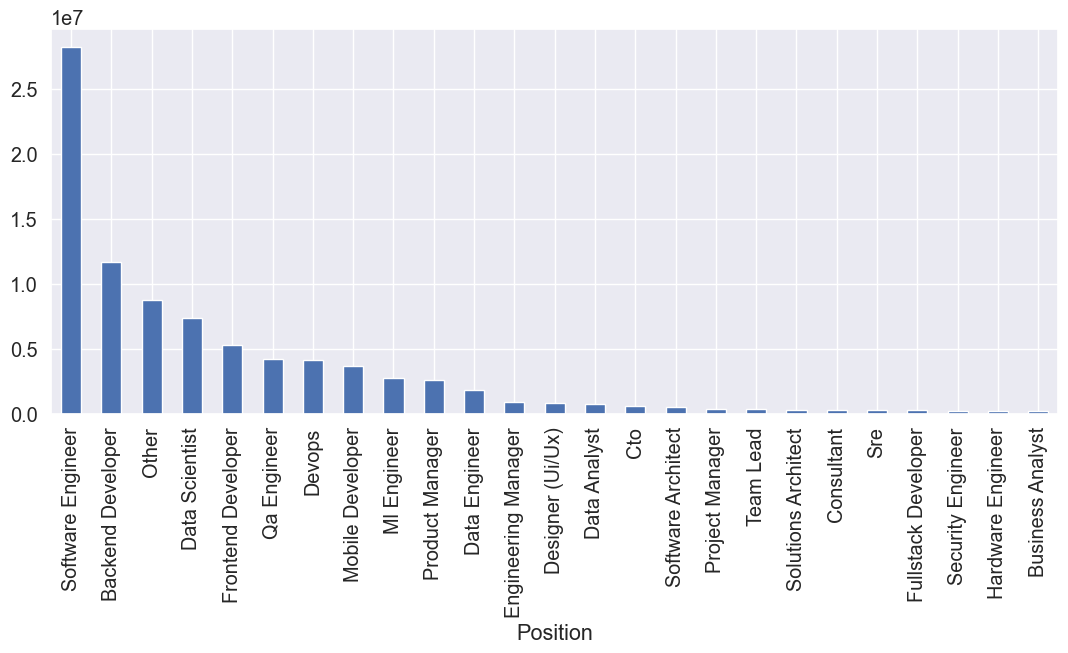

In [174]:
x = df16.groupby(['Position']).sum().copy()
ax = x.YearlySalary.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate("", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

## According to the above chart we can infer that Software Engineers significantly earn very high than the other Employees, next to earn more is Backend Developer but this is bias since the both of these values are highly populated

## Bonus vs Position

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\1712315471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df16.groupby(['Position']).sum().copy()


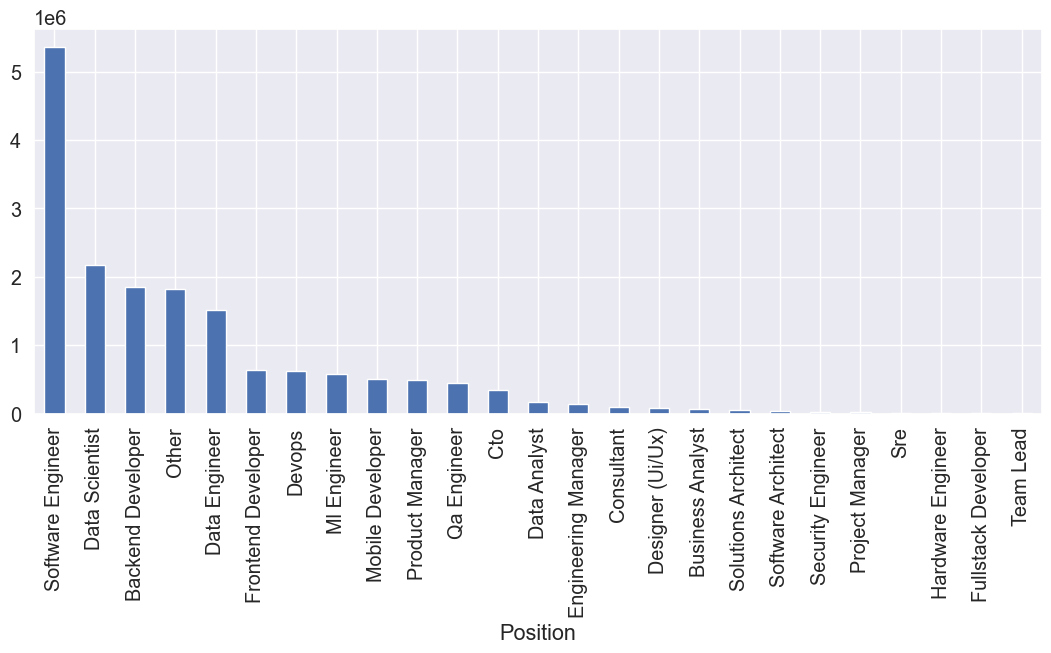

In [175]:
x = df16.groupby(['Position']).sum().copy()
ax = x.YearlyBonus.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate("", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

## For the bonus too we see a similar result, software engineers get higher percentage of bonuses than others

# Company Type vs Salary

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\3835935967.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df16.groupby(['CompanyType']).sum().copy()


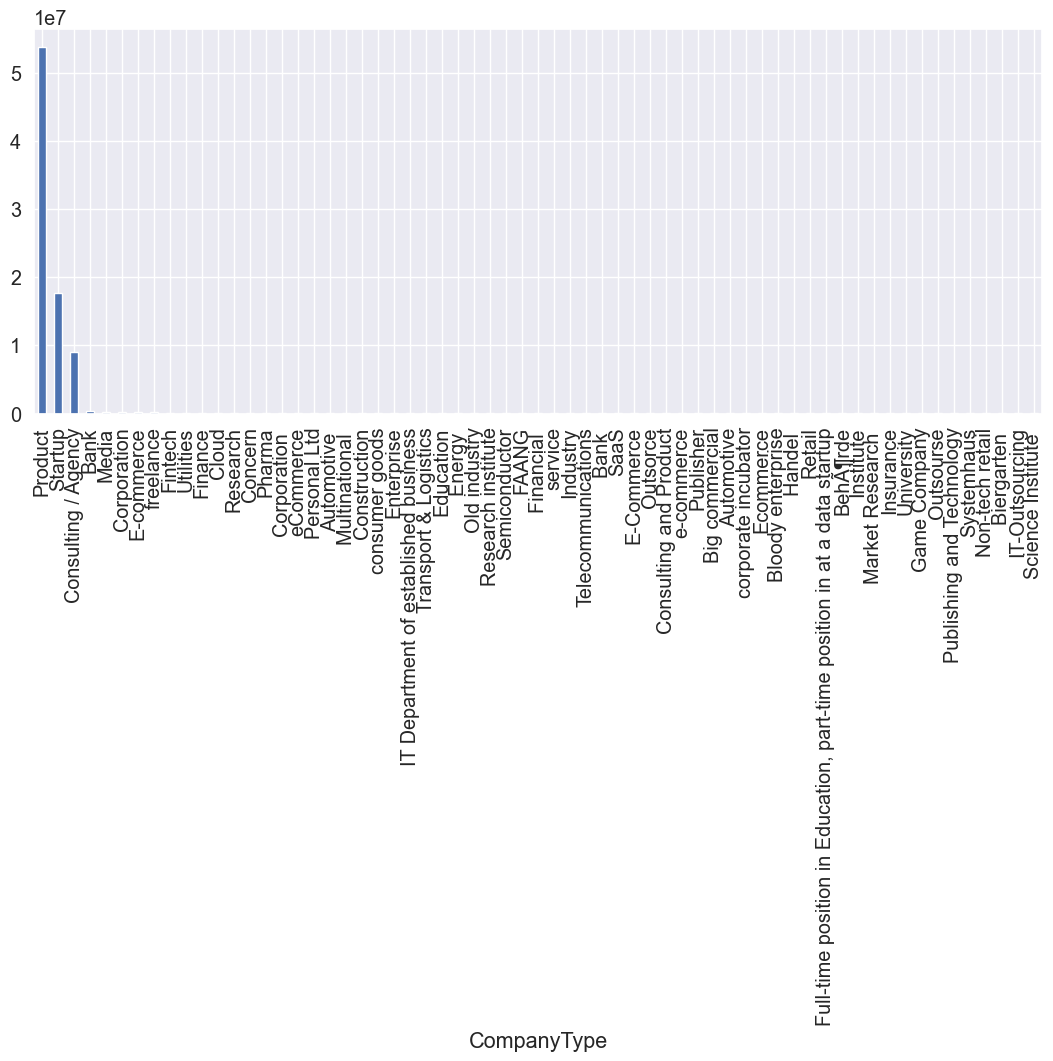

In [176]:
x = df16.groupby(['CompanyType']).sum().copy()
ax = x.YearlySalary.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate("", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

## From this plot we can infer that the production company employees tend to earn more than the other employees

# Company Type vs Experience

C:\Users\hasan\AppData\Local\Temp\ipykernel_10208\668721901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df16.groupby(['CompanyType']).sum().copy()


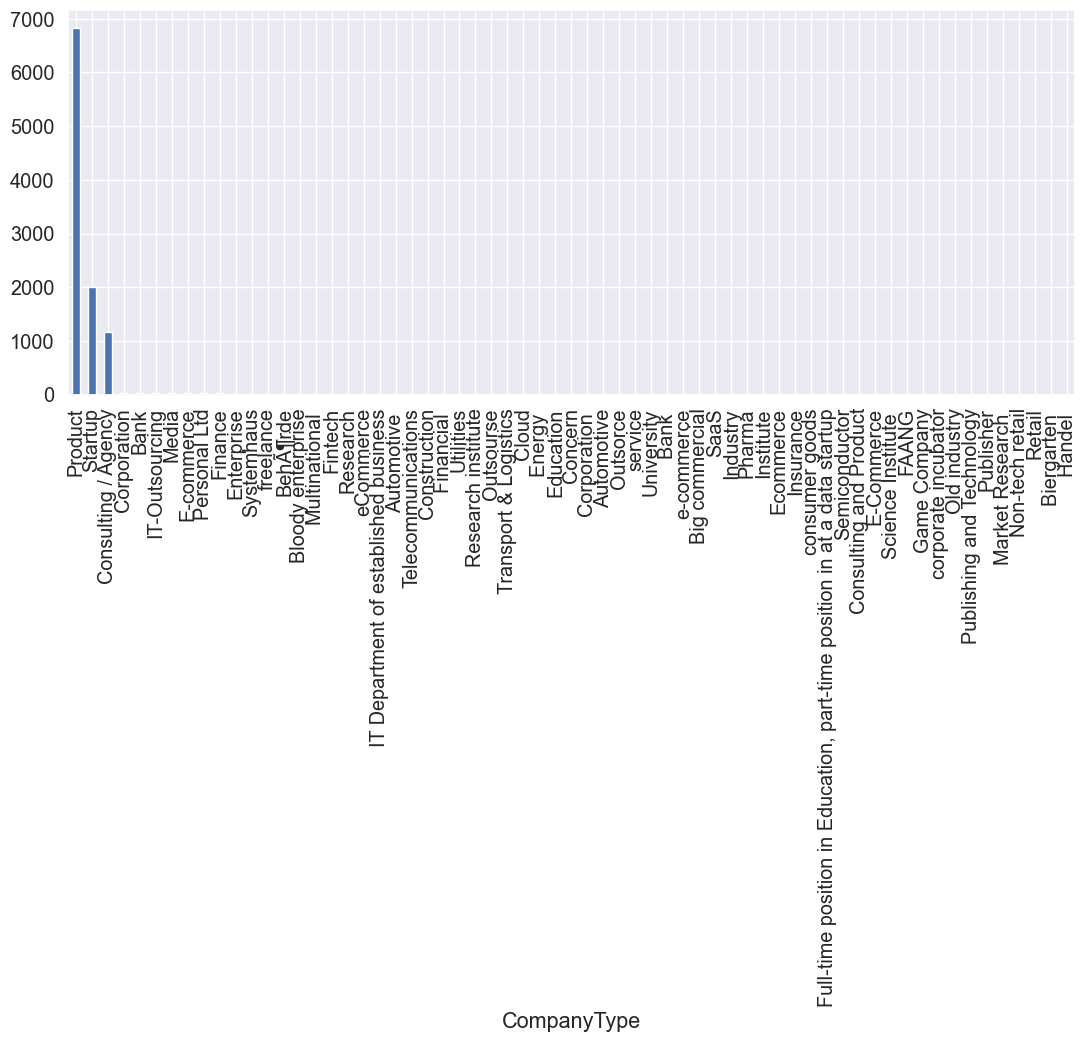

In [180]:
x = df16.groupby(['CompanyType']).sum().copy()
ax = x.Experience.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5));

for p in ax.patches:
    ax.annotate("", 
                (p.get_x() * 1.007, p.get_height() * 0.75),
                color='black')

## Clearly the three Company Types Employees have the highest experience Product, Startup and Consulting Agency

## Chi Squared Tests

In [194]:
# Get list of categorical columns in your data
categorical_cols = [col for col in df16.columns if df16[col].dtype == 'object']

# Perform Chi-Square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df16[col], df16['CompanyType'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square test results for column "{col}":')
    print(f'Chi2 statistic: {chi2:.2f}')
    print(f'P-value: {p_value:.2f}')
    print(f'Degrees of freedom: {dof}')
#     print('Expected frequencies:')
#     print(expected)
    print()


Chi-Square test results for column "Timestamp":
Chi2 statistic: 67143.52
P-value: 0.00
Degrees of freedom: 61566

Chi-Square test results for column "Gender":
Chi2 statistic: 79.86
P-value: 1.00
Degrees of freedom: 124

Chi-Square test results for column "City":
Chi2 statistic: 13006.30
P-value: 0.00
Degrees of freedom: 6138

Chi-Square test results for column "Position":
Chi2 statistic: 929.43
P-value: 1.00
Degrees of freedom: 1488

Chi-Square test results for column "Seniority level":
Chi2 statistic: 195.51
P-value: 0.30
Degrees of freedom: 186

Chi-Square test results for column "EmploymentStatus":
Chi2 statistic: 3785.52
P-value: 0.00
Degrees of freedom: 744

Chi-Square test results for column "Ð¡ontractDuration":
Chi2 statistic: 233.21
P-value: 0.00
Degrees of freedom: 124

Chi-Square test results for column "MainLanguage":
Chi2 statistic: 380.39
P-value: 1.00
Degrees of freedom: 558

Chi-Square test results for column "CompanySize":
Chi2 statistic: 415.31
P-value: 0.00
Degrees of

#### For the columns TimeStamp, CompanyType, CompanySize, City, Employment Statu  we reject the null hypothesis of independence and conclude that the two variables are associated.

In [197]:
# Perform Chi-Square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df16[col], df16['LostJob'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square test results for column "{col}":')
    print(f'Chi2 statistic: {chi2:.2f}')
    print(f'P-value: {p_value:.2f}')
    print(f'Degrees of freedom: {dof}')
    print()


Chi-Square test results for column "Timestamp":
Chi2 statistic: 2273.05
P-value: 0.00
Degrees of freedom: 1998

Chi-Square test results for column "Gender":
Chi2 statistic: 6.42
P-value: 0.17
Degrees of freedom: 4

Chi-Square test results for column "City":
Chi2 statistic: 722.46
P-value: 0.00
Degrees of freedom: 198

Chi-Square test results for column "Position":
Chi2 statistic: 52.67
P-value: 0.30
Degrees of freedom: 48

Chi-Square test results for column "Seniority level":
Chi2 statistic: 14.39
P-value: 0.03
Degrees of freedom: 6

Chi-Square test results for column "EmploymentStatus":
Chi2 statistic: 58.44
P-value: 0.00
Degrees of freedom: 24

Chi-Square test results for column "Ð¡ontractDuration":
Chi2 statistic: 35.80
P-value: 0.00
Degrees of freedom: 4

Chi-Square test results for column "MainLanguage":
Chi2 statistic: 11.02
P-value: 0.89
Degrees of freedom: 18

Chi-Square test results for column "CompanySize":
Chi2 statistic: 21.88
P-value: 0.01
Degrees of freedom: 8

Chi-Square

### We can infer that "Lost job in Covid" column have association with Company Size, Employment Status, Ð¡ontractDuration, Senority Level, City and TimeStamp

# We have done many chi square tests before too for handling missing values 

In [198]:
num_cols = list(df16.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['Age',
 'Experience',
 'Germany_Experience',
 'YearlySalary',
 'YearlyBonus',
 'LastAnnualSalary',
 'LastAnnualBonus',
 'VacationDays',
 'HoursPerWeek',
 'AdditonalSupport']

# Cluster Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

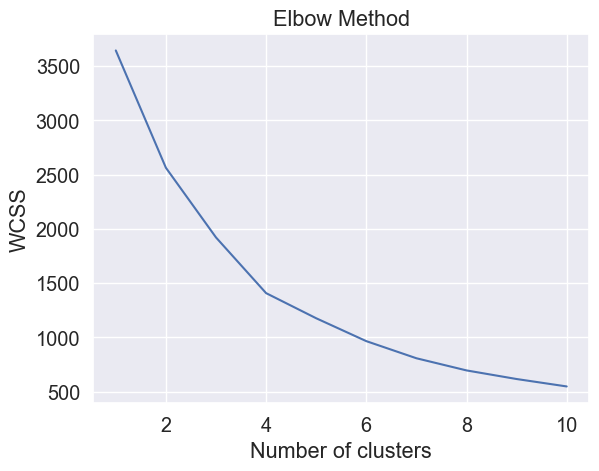

<IPython.core.display.Javascript object>

0    706
1    419
3     89
2      1
Name: cluster, dtype: int64


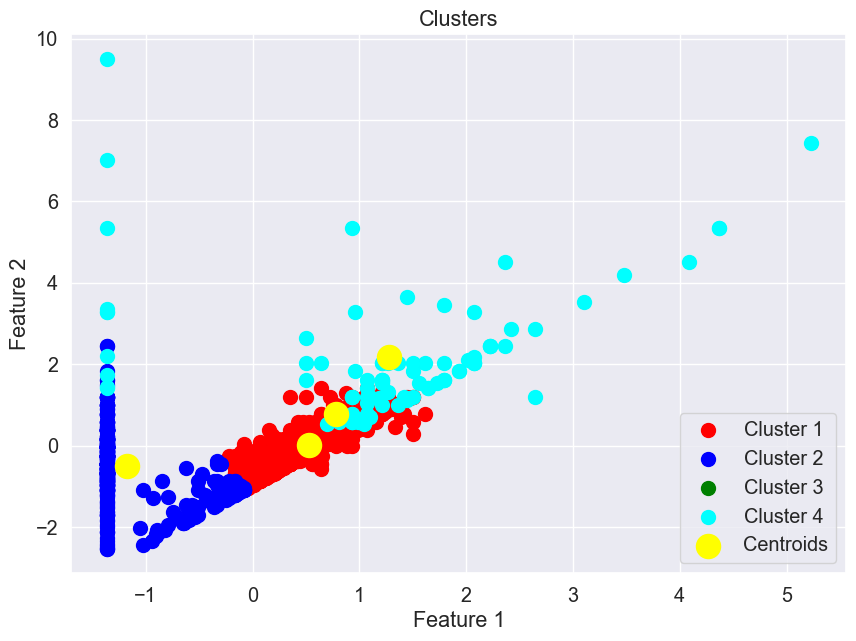

In [201]:
# Extract relevant columns for clustering analysis
X = df16[['LastAnnualSalary', 'YearlySalary', 'YearlyBonus']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df16['cluster'] = y_kmeans

# View the distribution of data points among clusters
print(df16['cluster'].value_counts())

# Visualize the clusters
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
ax.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
ax.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
ax.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [202]:
print(df16['cluster'].value_counts())

0    706
1    419
3     89
2      1
Name: cluster, dtype: int64


## After clustering the respected we found by elbow method that the best clustering of our data will be with 4 clusters, This tells us that the majority of data points (706) belong to cluster 0, while the smallest cluster is cluster 2, with only 1 point. 

In [204]:
df17 = df16.copy()
df16 = df16.drop('cluster', axis=1)

In [205]:
df17.to_csv('Final_IT_Salary.csv', index=False)